LIBRARIES

In [376]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score, confusion_matrix, classification_report

DATA ANALYSIS

In [2]:
df = pd.read_csv("heart (1).csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Checking for nan values

In [4]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Checking for duplicates

In [5]:
df.duplicated().sum()

0

checking count, mean, min and max and etc...

In [32]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


ENCODING

replacing strings with numerical values for easy manipulation of data

we will use label encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

SEX

1 --> Male


0 --> Female

In [7]:
dfle = df
dfle.Sex = le.fit_transform(dfle.Sex)
dfle

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,1,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,1,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,0,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Exercise Angina

N --> 0

Y --> 1

In [8]:
dfle = df
dfle.ExerciseAngina = le.fit_transform(dfle.ExerciseAngina)
dfle

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,0,1.2,Flat,1
914,68,1,ASY,144,193,1,Normal,141,0,3.4,Flat,1
915,57,1,ASY,130,131,0,Normal,115,1,1.2,Flat,1
916,57,0,ATA,130,236,0,LVH,174,0,0.0,Flat,1


Chest Pain Types

In [37]:
df.ChestPainType.value_counts()

ChestPainType
0    496
2    203
1    173
3     46
Name: count, dtype: int64

0 --> ASY

1 --> ATA

2 --> NAP

3 --> TA

In [ ]:
dfle = df
dfle.ChestPainType = le.fit_transform(dfle.ChestPainType)
dfle

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


Resting ECG

In [38]:
df.RestingECG.value_counts()

RestingECG
1    552
0    188
2    178
Name: count, dtype: int64

0 --> LVH

1 --> Normal

2 --> ST

In [40]:
dfle = df
dfle.RestingECG	= le.fit_transform(dfle.RestingECG)
dfle

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


ST Slope

In [ ]:
df.ST_Slope.value_counts()

ST_Slope
1    460
2    395
0     63
Name: count, dtype: int64

0 --> Down

1 --> Flat

2 --> Up

In [39]:
dfle = df
dfle.ST_Slope = le.fit_transform(dfle.ST_Slope)
dfle

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


FINAL RESULT AFTER REMOVING STRING VALUES

In [45]:
df = dfle.copy()
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


VISUALIZATION

please note that the pie chart might look weird in some cases due to the large variation in data

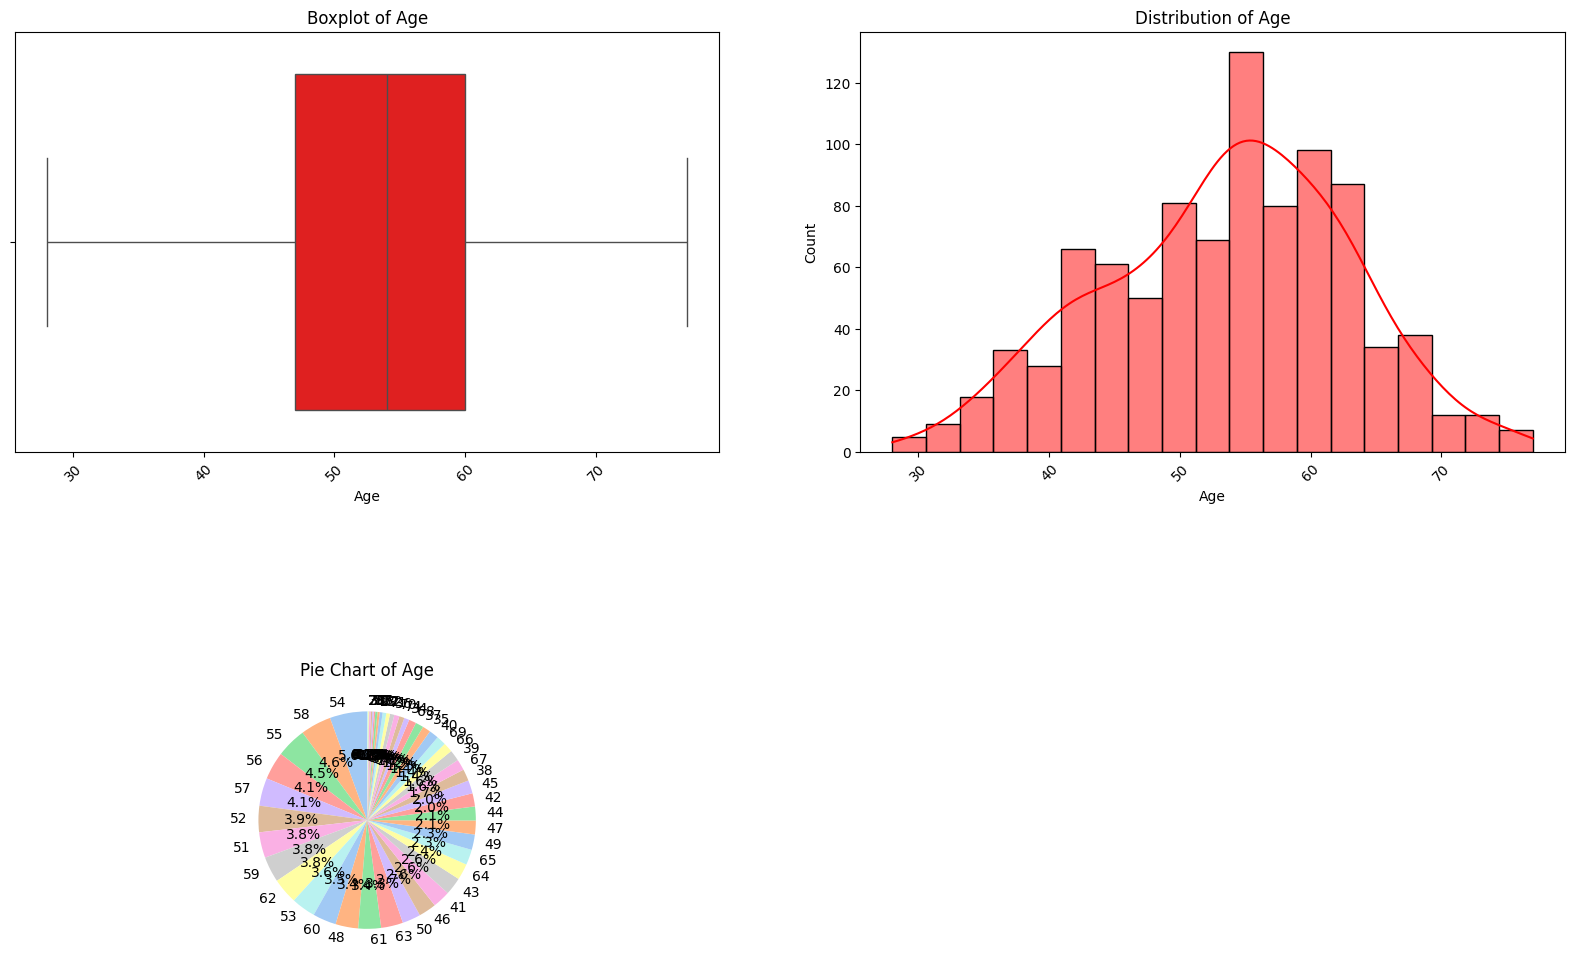

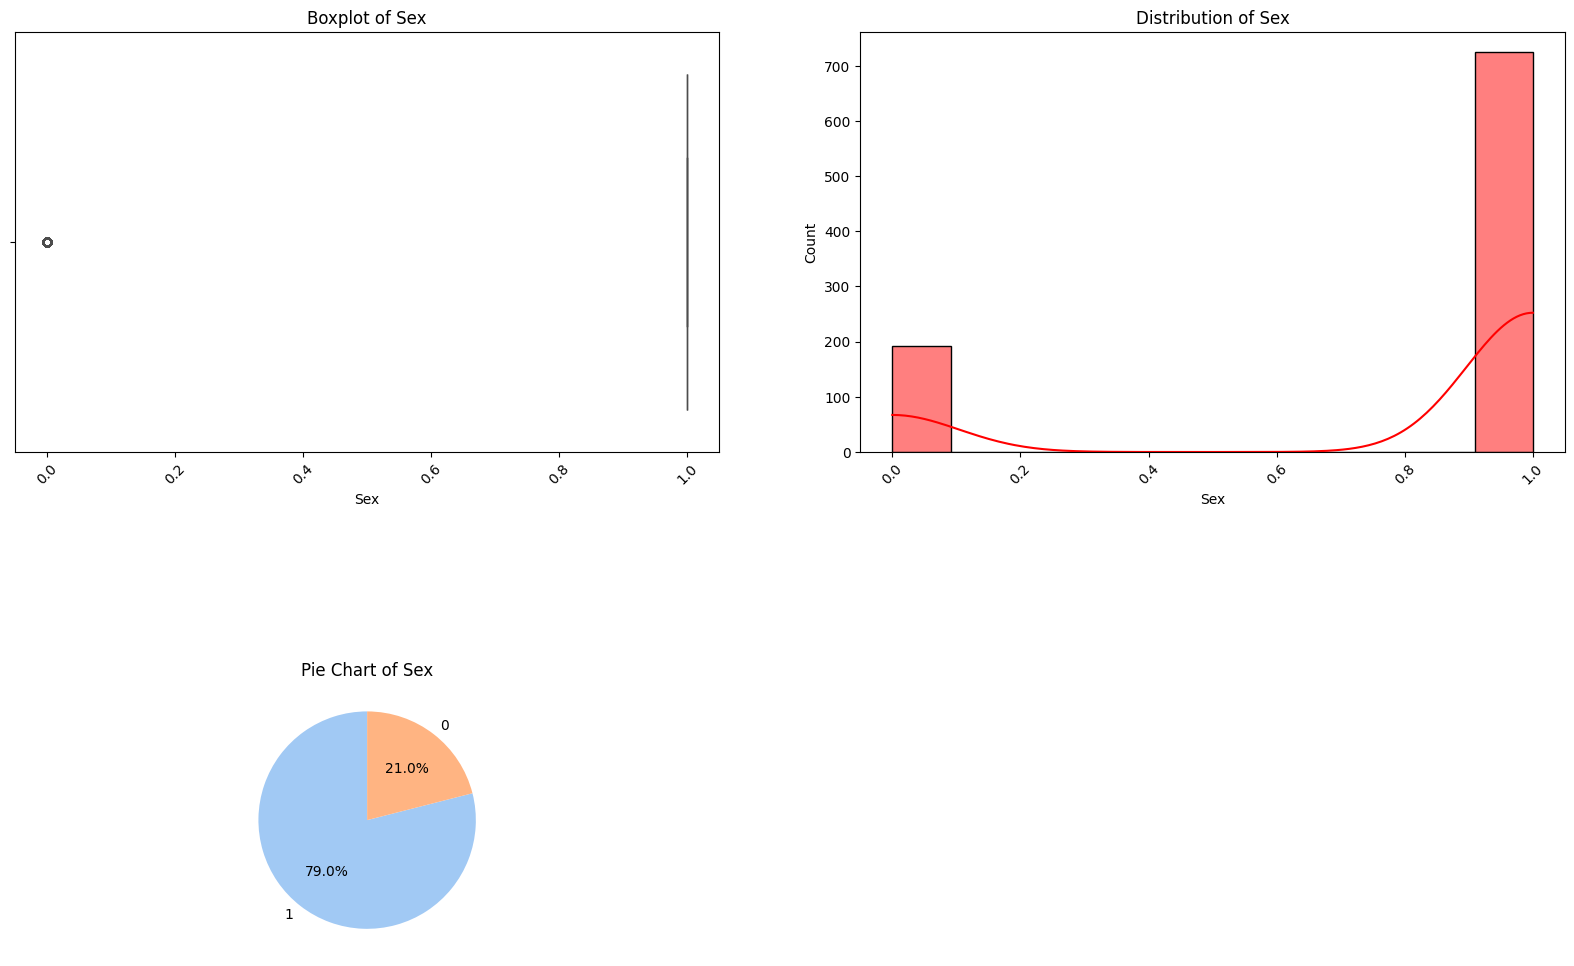

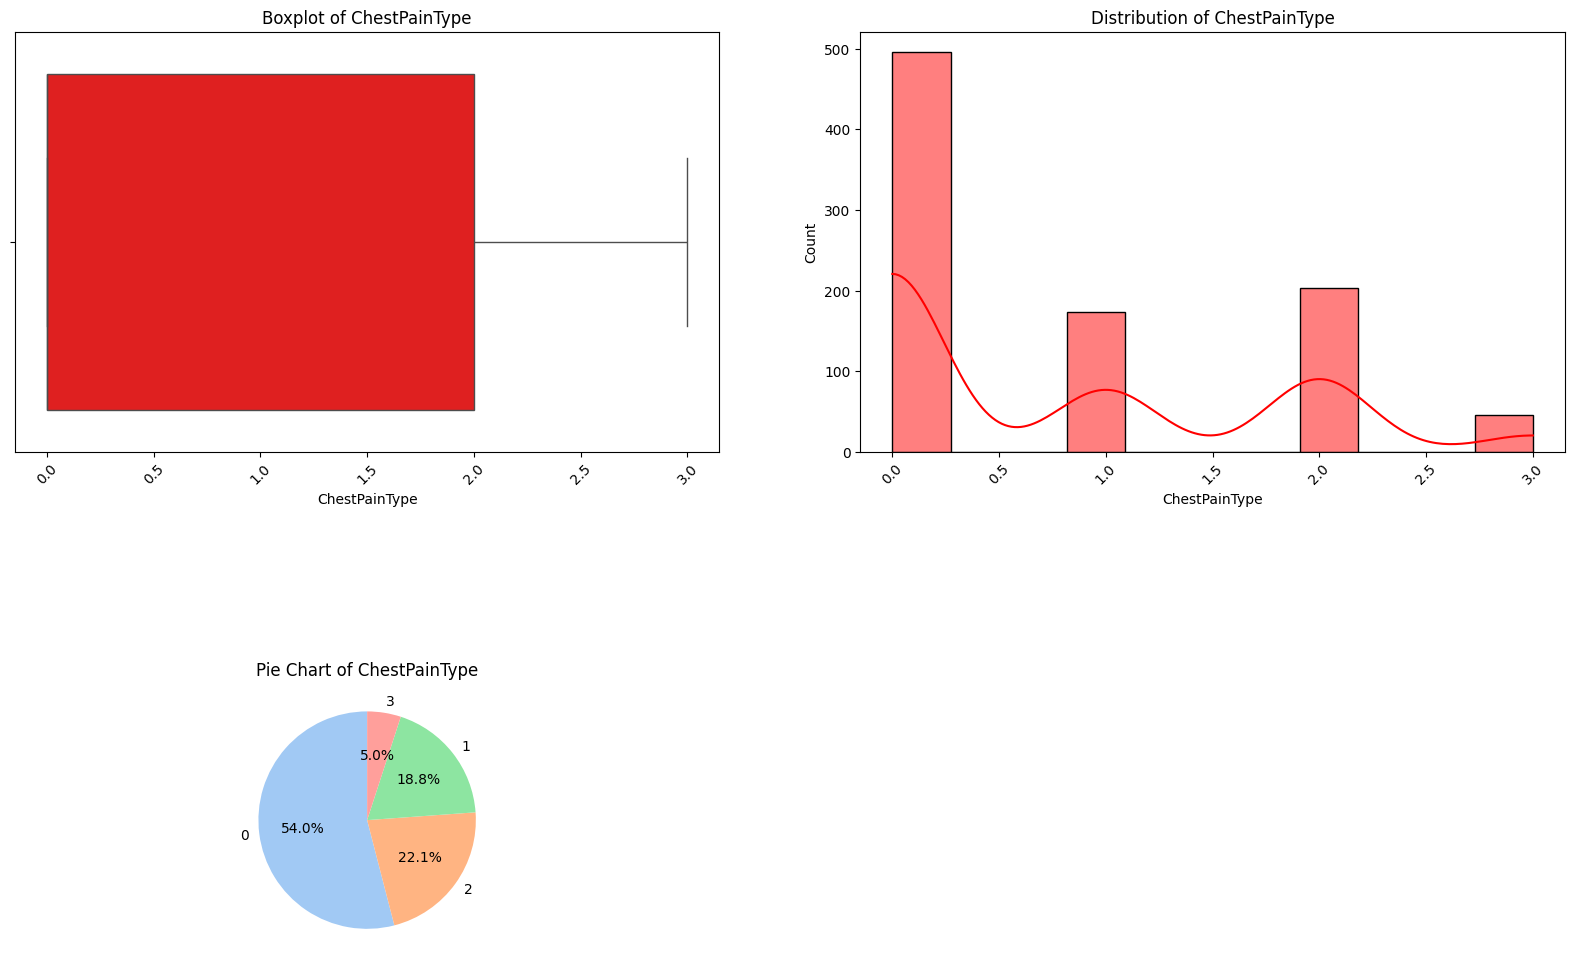

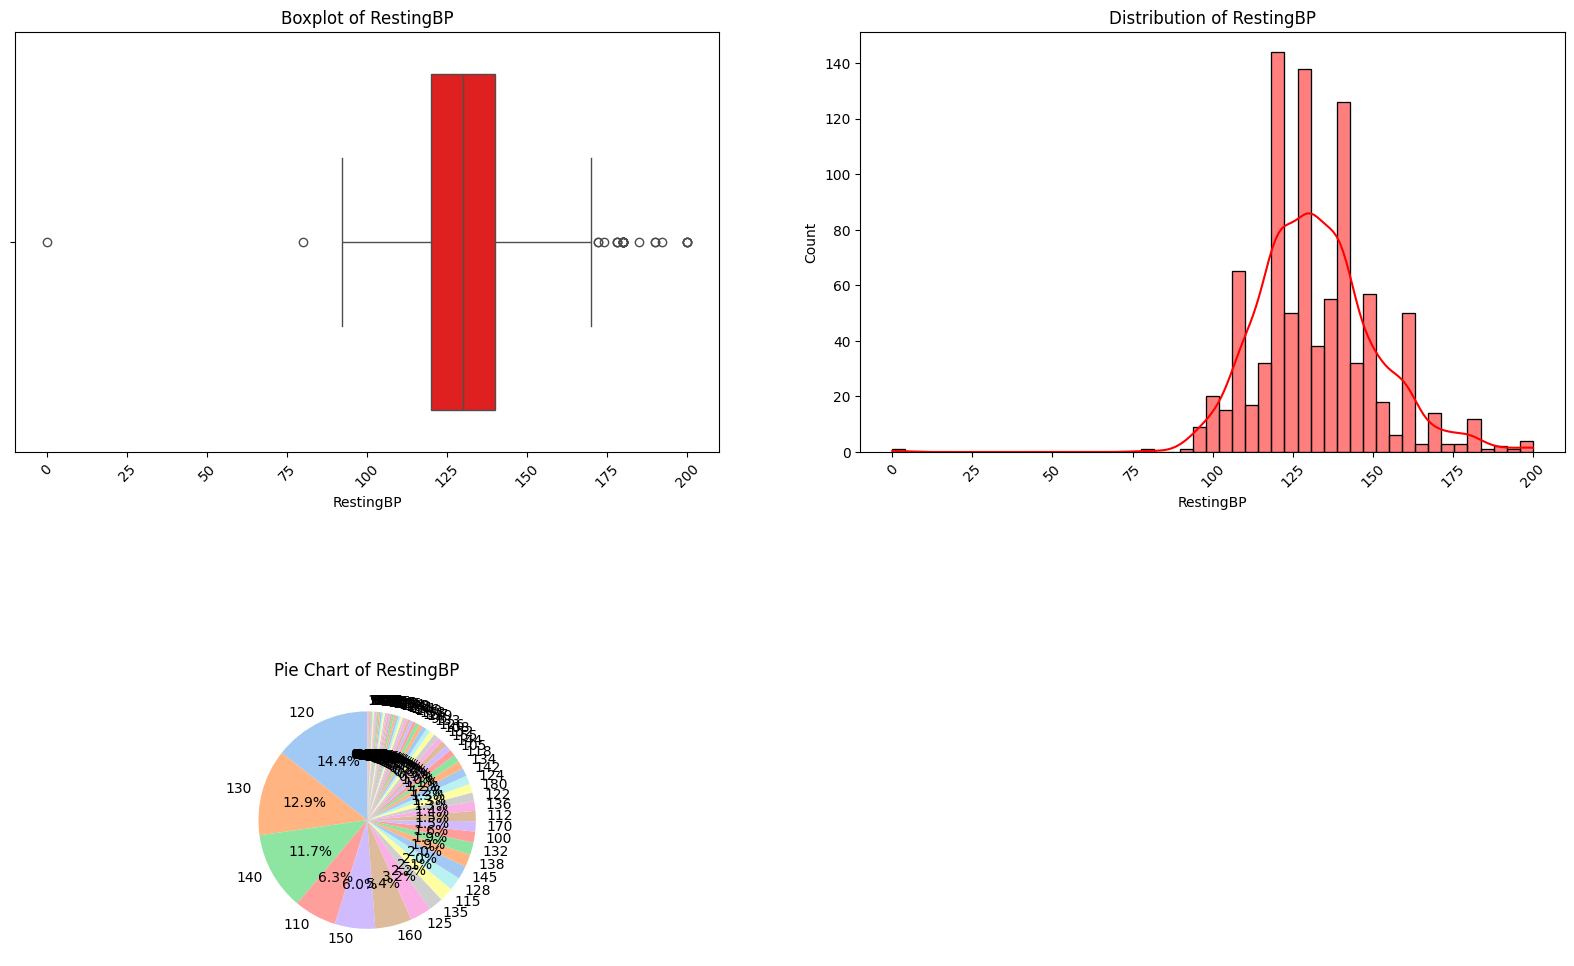

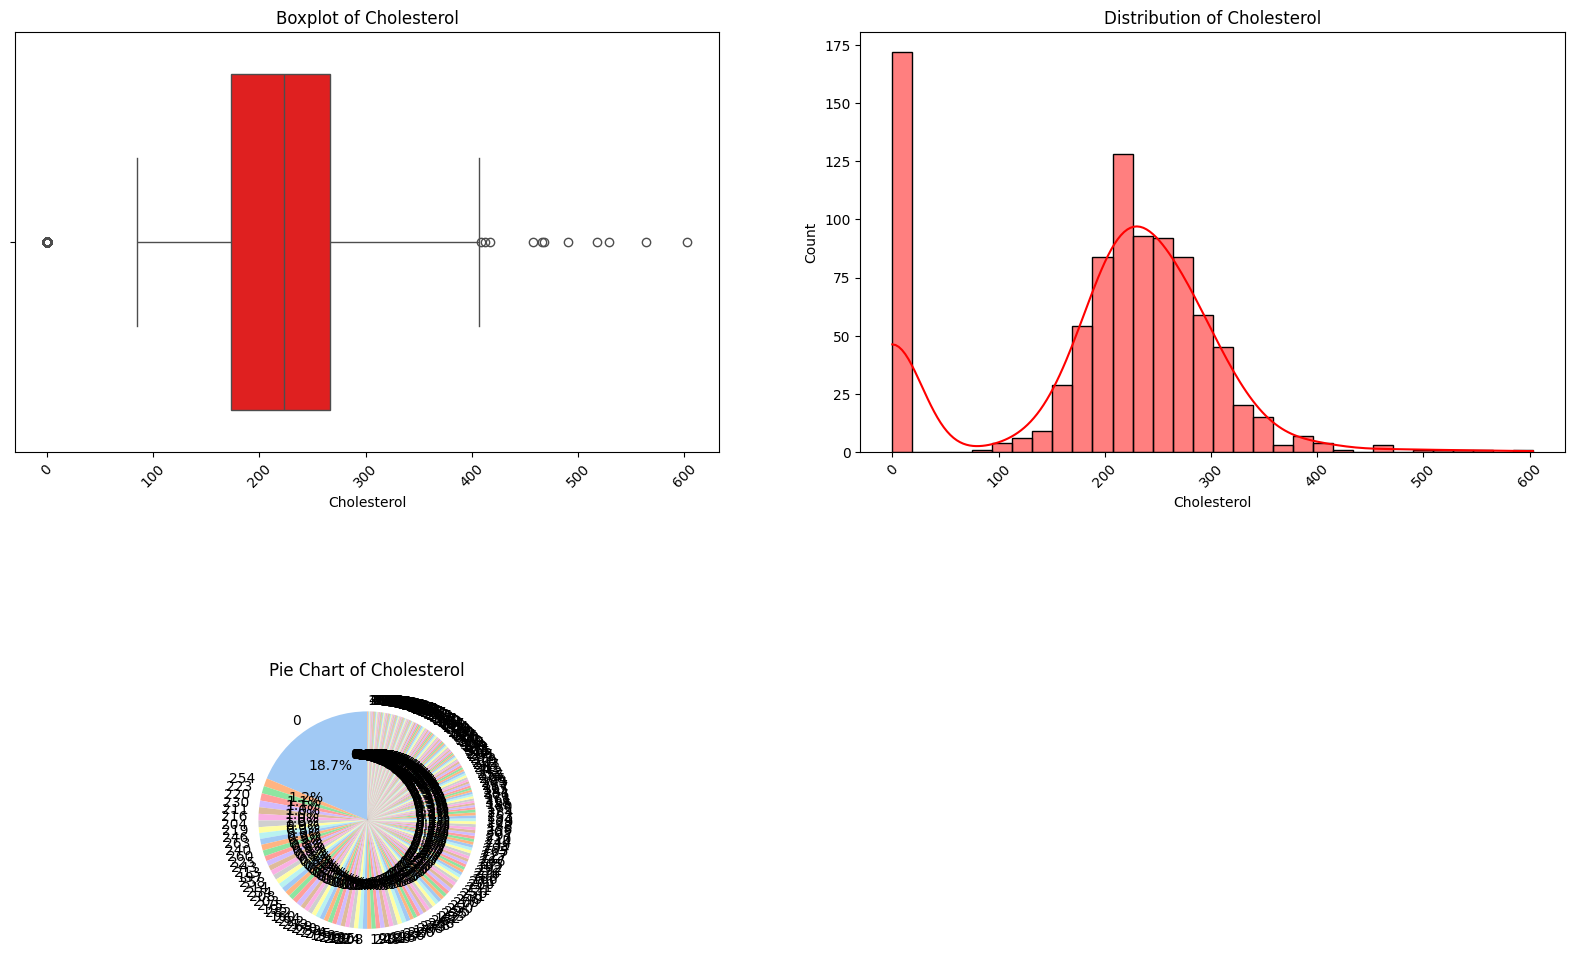

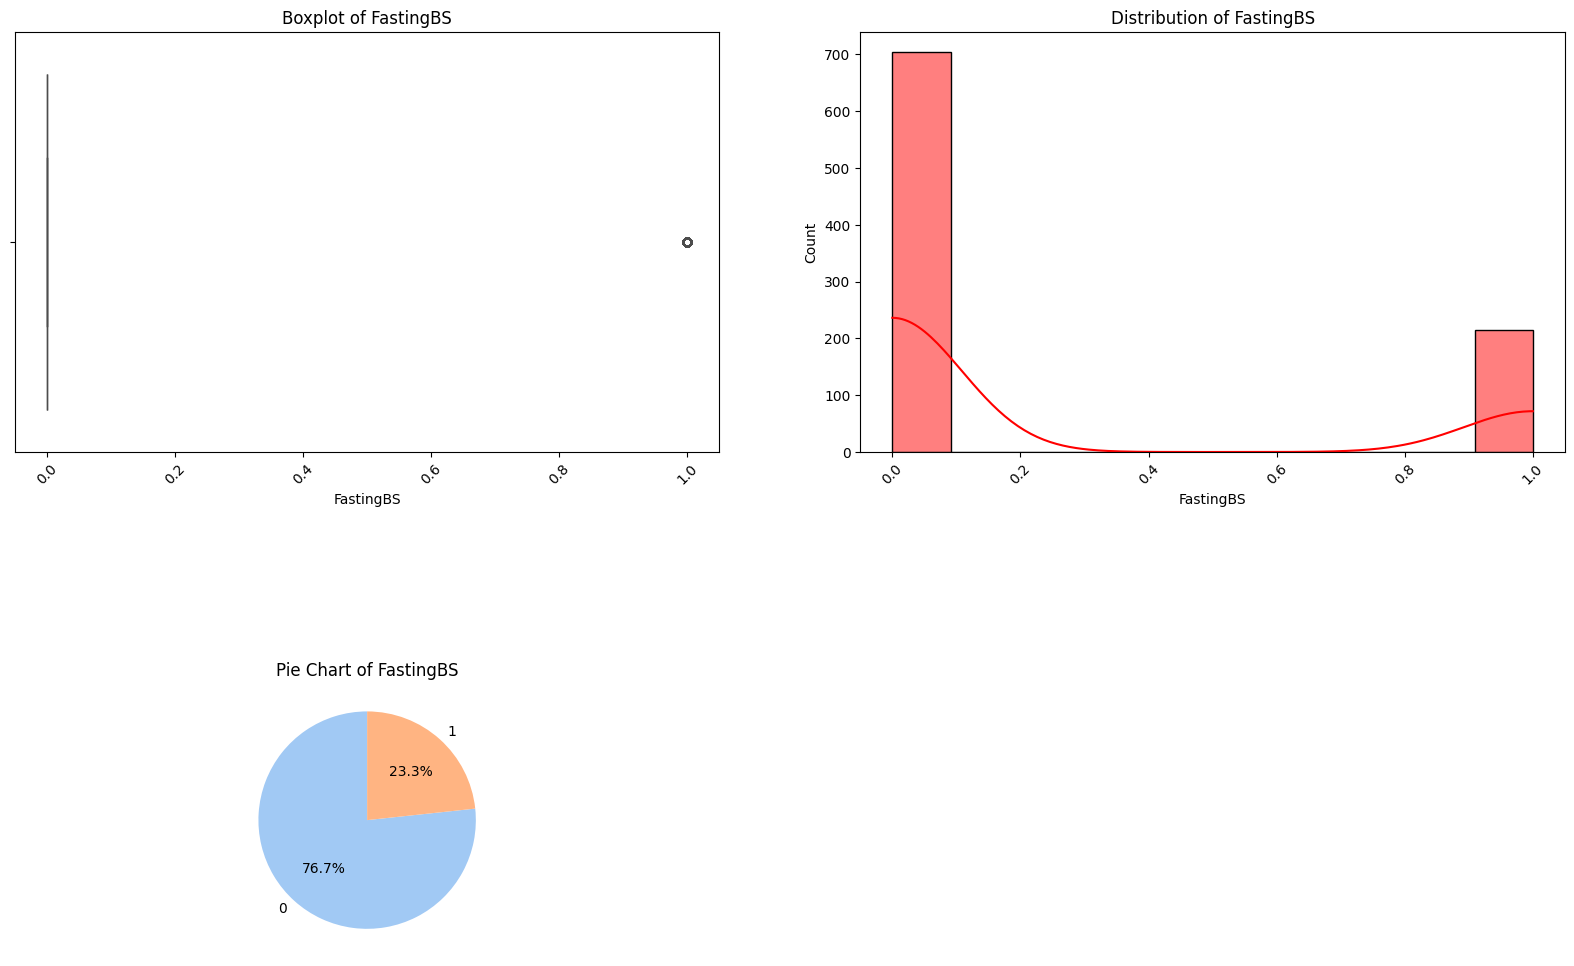

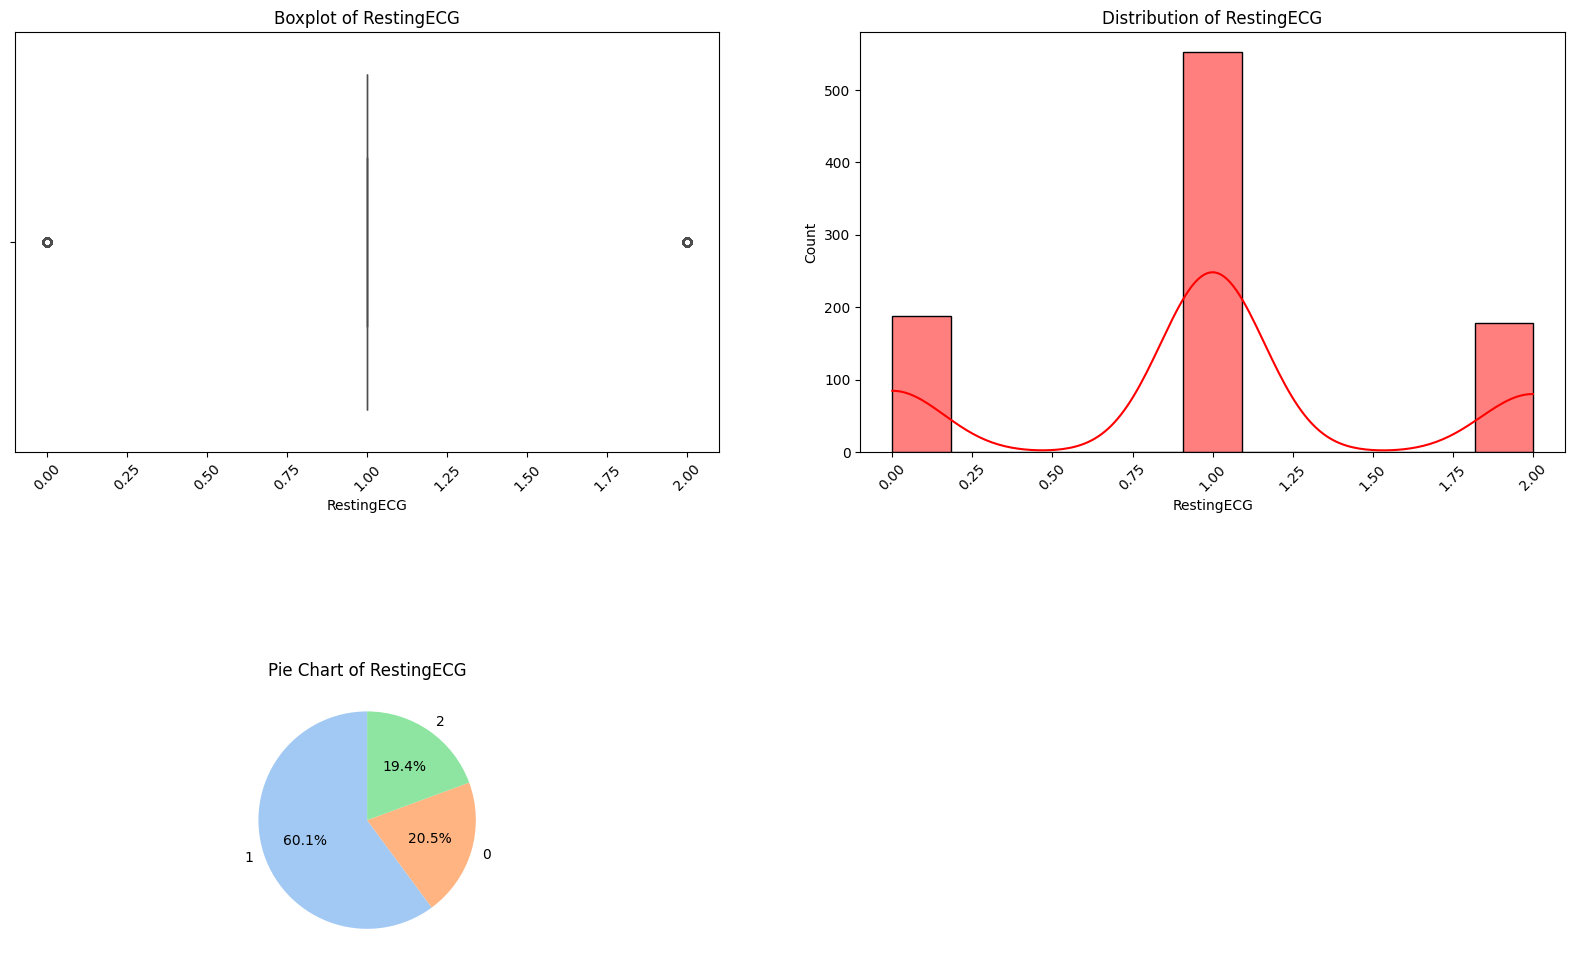

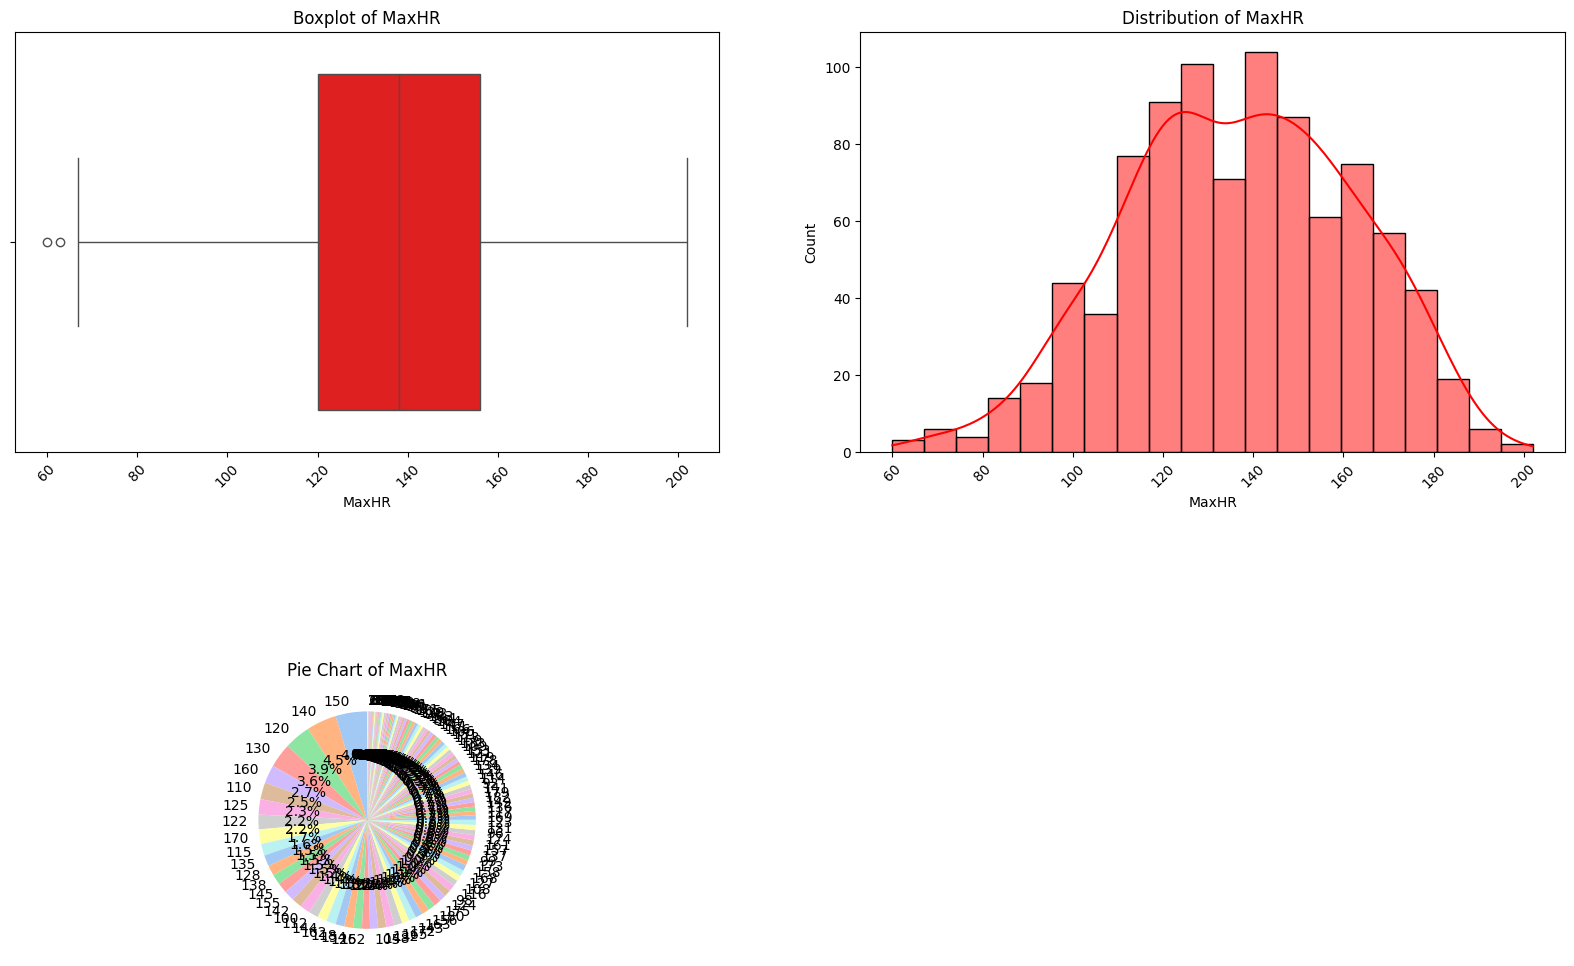

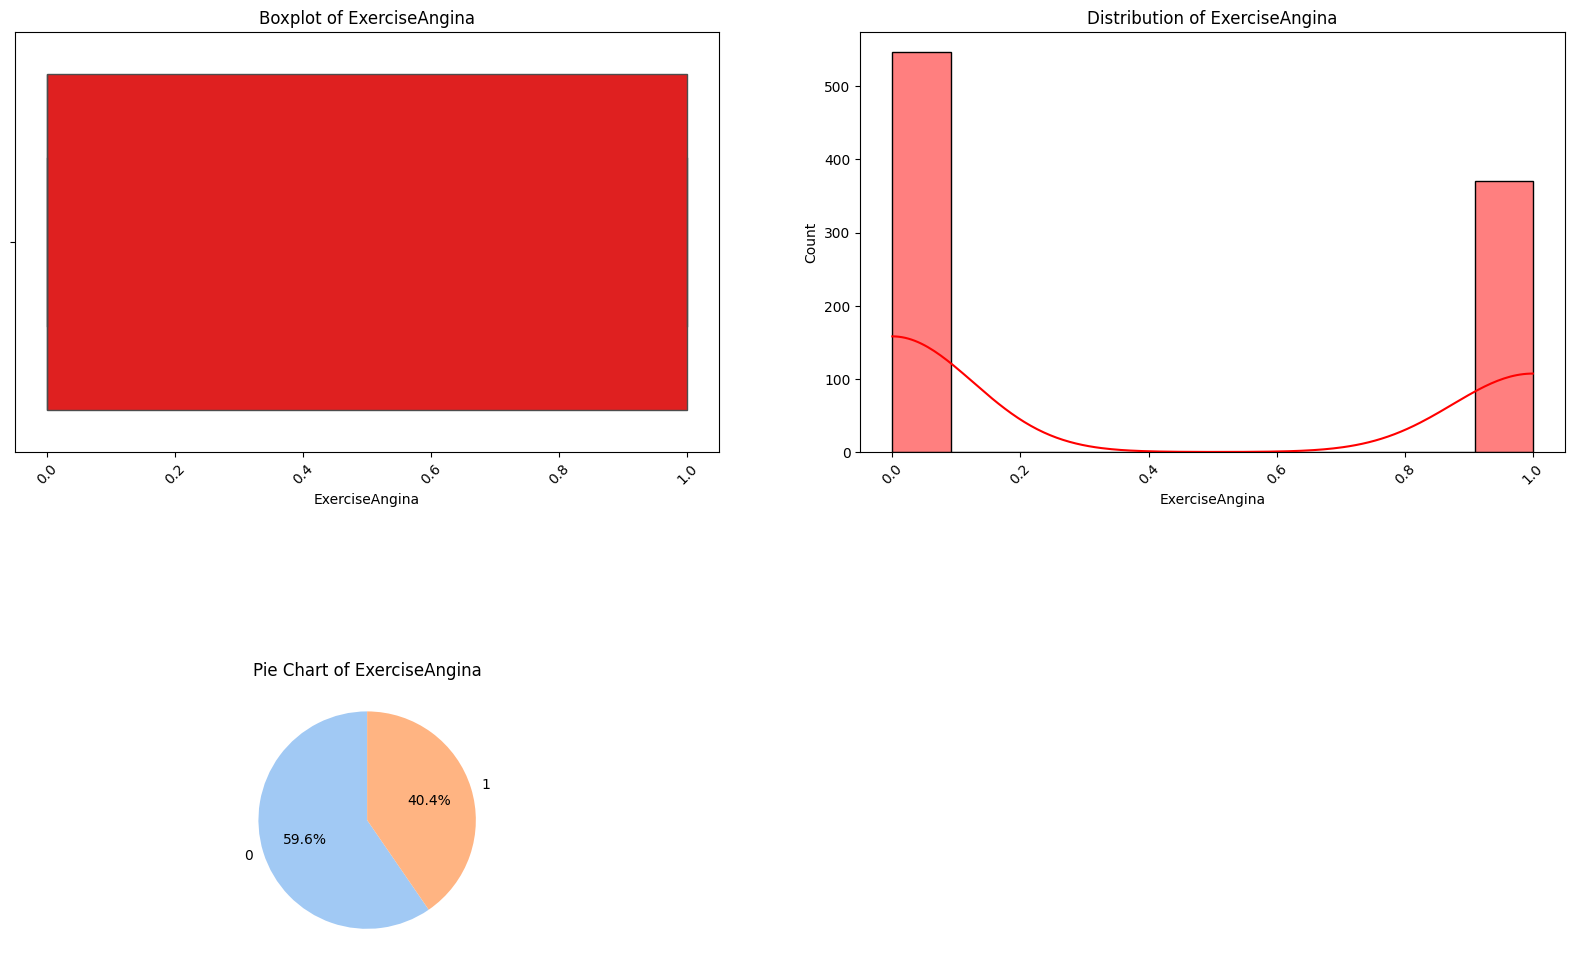

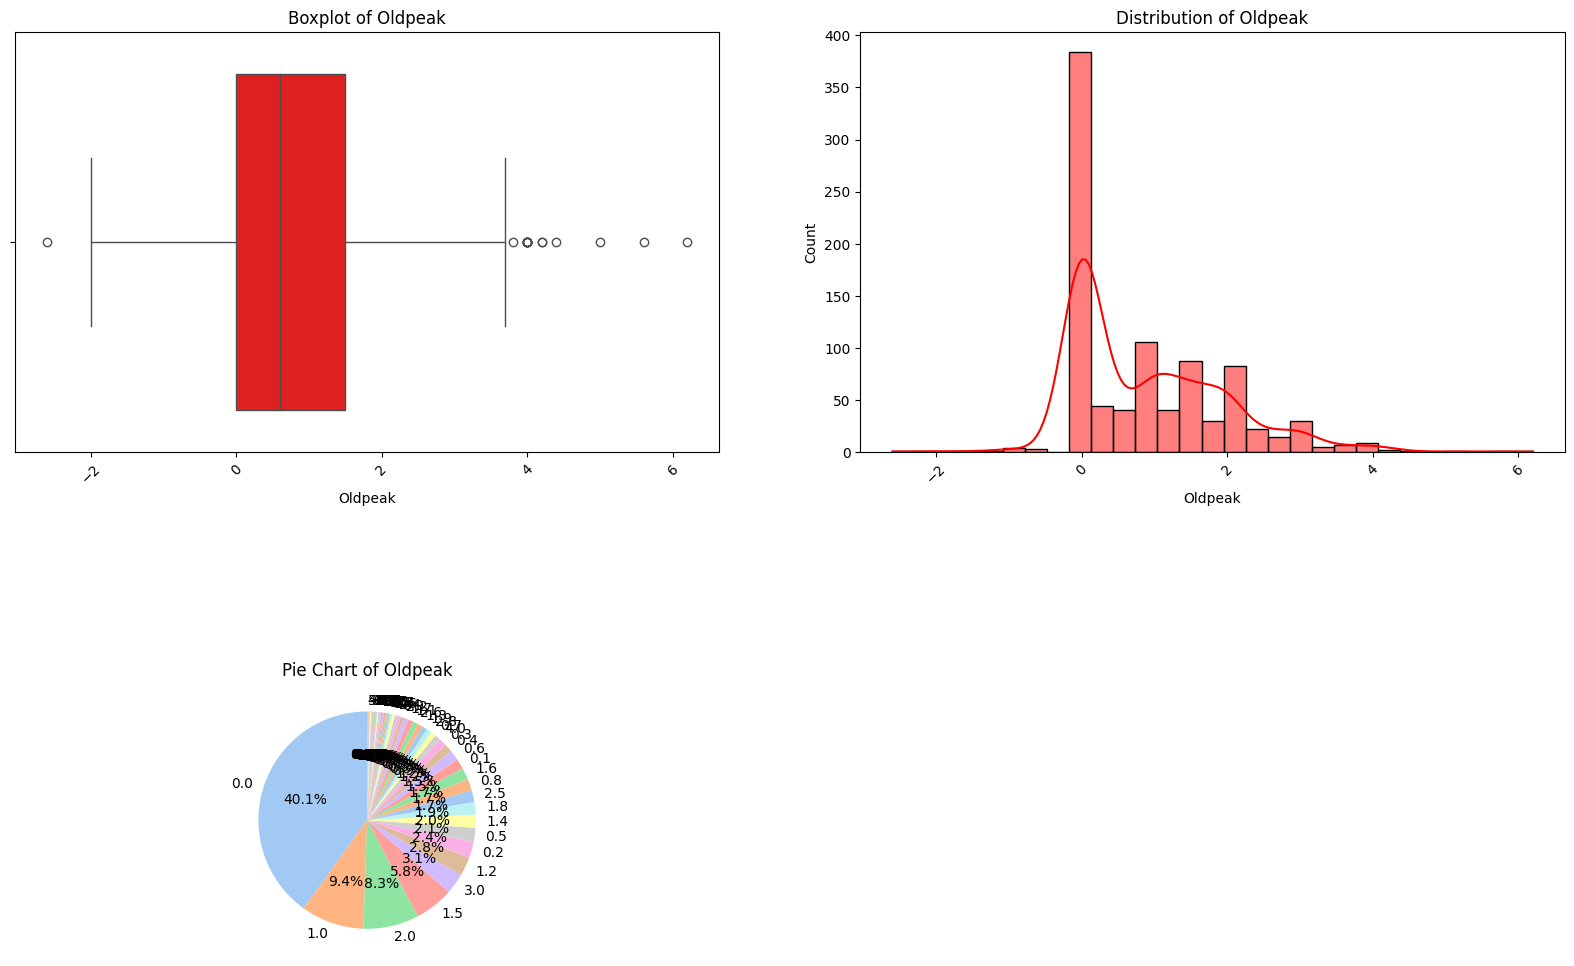

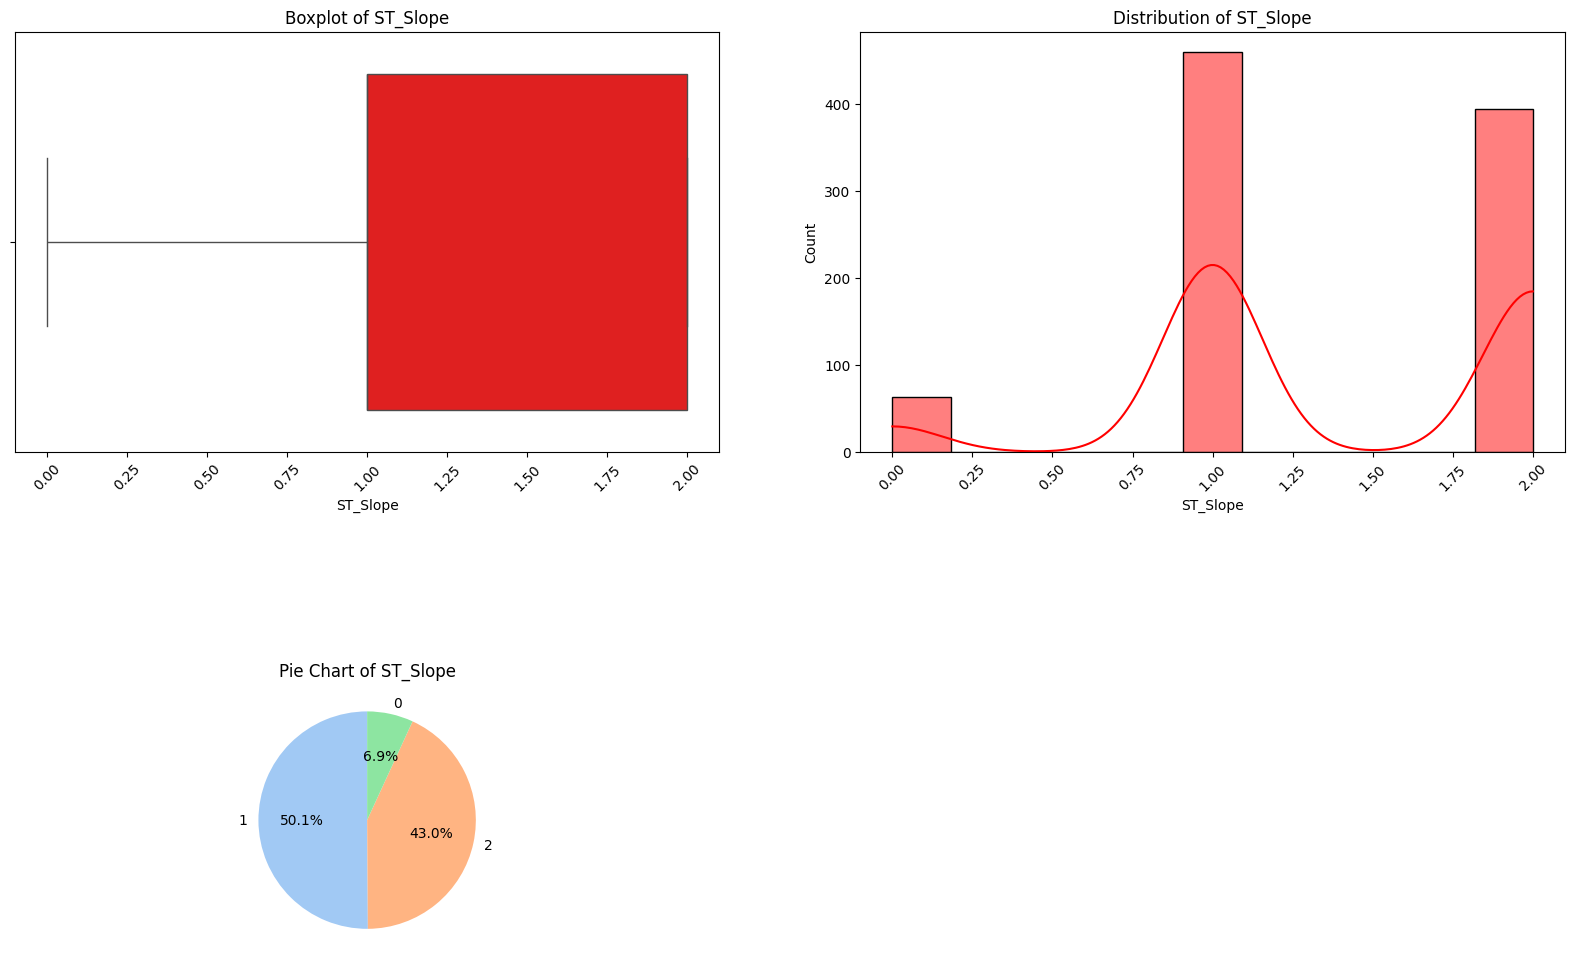

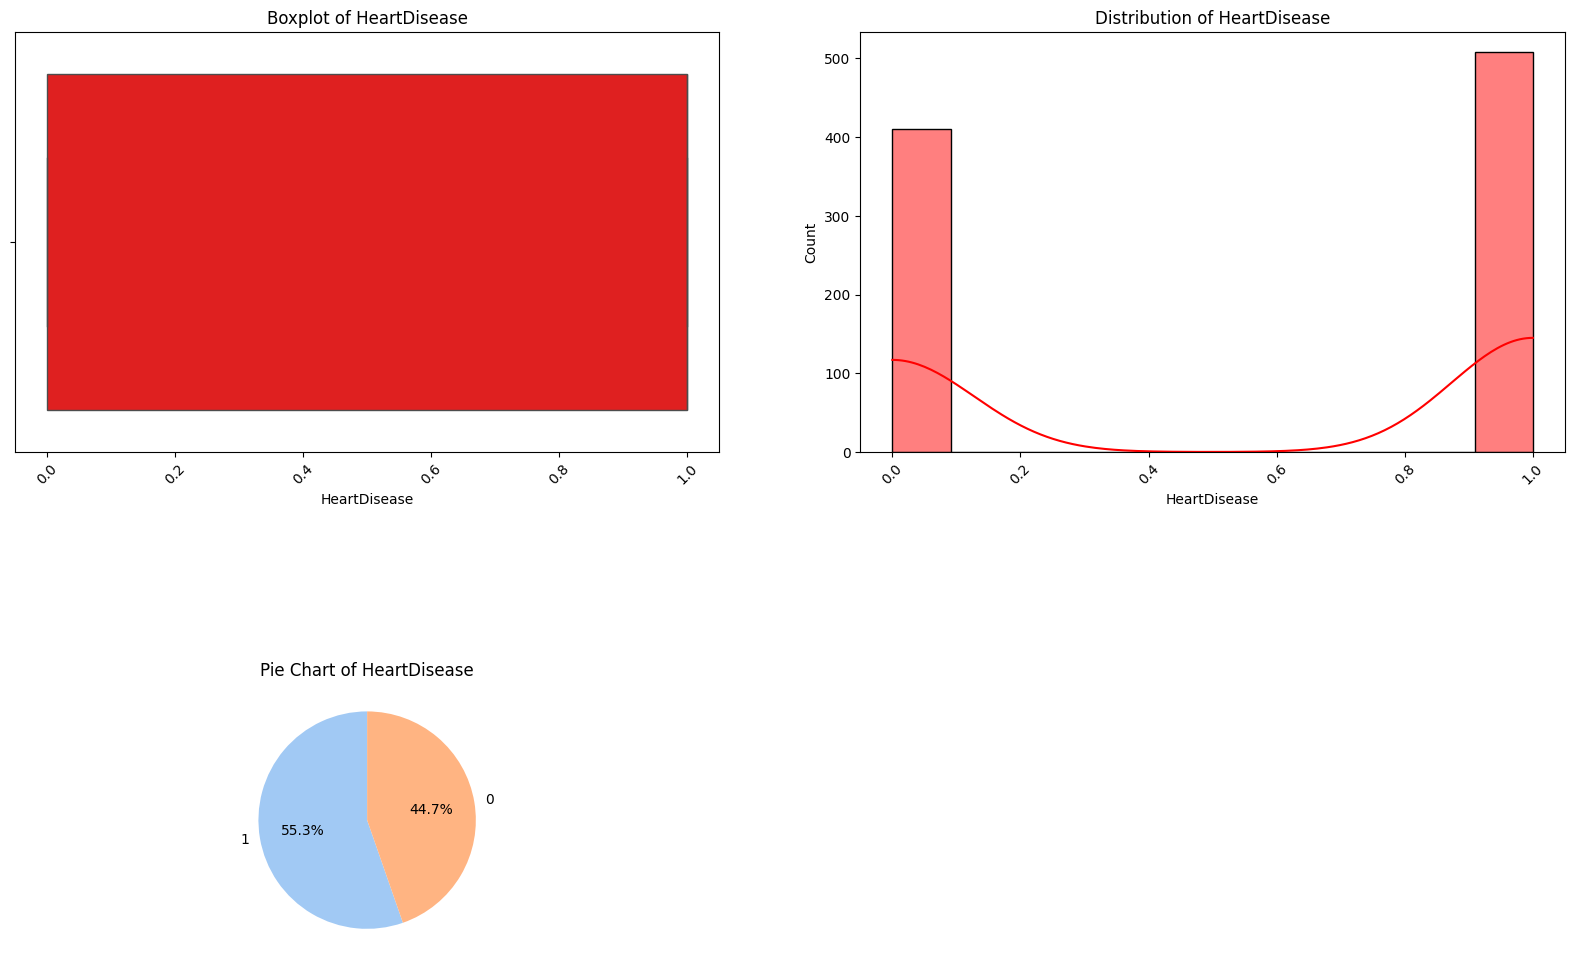

In [30]:
for column in df.columns:
    plt.figure(figsize=(20, 12))
    
    # Subplot 1: Boxplot
    plt.subplot(2, 2, 1)
    sns.boxplot(x=df[column], color='red')
    plt.title(f'Boxplot of {column}')
    plt.xticks(rotation=45)
    
    # Subplot 2: Distribution Plot (Histogram)
    plt.subplot(2, 2, 2)
    sns.histplot(df[column], color='red', kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    
    # Subplot 5: Pie Chart (for proportions of unique values)
    plt.subplot(3, 2, 5)
    unique_counts = df[column].value_counts()
    unique_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title(f'Pie Chart of {column}')
    plt.ylabel('') 


    plt.show()

From the boxplots, we can see that we have outliers in 4 features :
 1.  'RestingBp' 
 2.  'choristol' 
 3.  'maxhr' 
 4.  'Old peak' 

In [17]:
threshold = 1.5

# For RestingBP
Q1_bp = df['RestingBP'].quantile(0.25)
Q3_bp = df['RestingBP'].quantile(0.75)
IQR_bp = Q3_bp - Q1_bp


# For Cholesterol
Q1_chol = df['Cholesterol'].quantile(0.25)
Q3_chol = df['Cholesterol'].quantile(0.75)
IQR_chol = Q3_chol - Q1_chol


# For MaxHR
Q1_hr = df['MaxHR'].quantile(0.25)
Q3_hr = df['MaxHR'].quantile(0.75)
IQR_hr = Q3_hr - Q1_hr

# For Oldpeak
Q1_op = df['Oldpeak'].quantile(0.25)
Q3_op = df['Oldpeak'].quantile(0.75)
IQR_op = Q3_op - Q1_op


# Print the bounds for each feature
print("\nBounds for each feature:")
print(f"RestingBP: Lower = {Q1_bp - threshold * IQR_bp:.2f}, Upper = {Q3_bp + threshold * IQR_bp:.2f}")
print(f"Cholesterol: Lower = {Q1_chol - threshold * IQR_chol:.2f}, Upper = {Q3_chol + threshold * IQR_chol:.2f}")
print(f"MaxHR: Lower = {Q1_hr - threshold * IQR_hr:.2f}, Upper = {Q3_hr + threshold * IQR_hr:.2f}")
print(f"Oldpeak: Lower = {Q1_op - threshold * IQR_op:.2f}, Upper = {Q3_op + threshold * IQR_op:.2f}")


Bounds for each feature:
RestingBP: Lower = 90.00, Upper = 170.00
Cholesterol: Lower = 32.62, Upper = 407.62
MaxHR: Lower = 66.00, Upper = 210.00
Oldpeak: Lower = -2.25, Upper = 3.75


In [18]:
df_1 = df 
df_1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


We will now drop all the outliers

In [19]:
# Define thresholds for all features
lower_bound_bp = Q1_bp - threshold * IQR_bp
upper_bound_bp = Q3_bp + threshold * IQR_bp

lower_bound_chol = Q1_chol - threshold * IQR_chol
upper_bound_chol = Q3_chol + threshold * IQR_chol

lower_bound_hr = Q1_hr - threshold * IQR_hr
upper_bound_hr = Q3_hr + threshold * IQR_hr

lower_bound_op = Q1_op - threshold * IQR_op
upper_bound_op = Q3_op + threshold * IQR_op

# Filter out outliers for all features
df_cleaned = df[
    (df['RestingBP'] >= lower_bound_bp) & (df['RestingBP'] <= upper_bound_bp) &
    (df['Cholesterol'] >= lower_bound_chol) & (df['Cholesterol'] <= upper_bound_chol) &
    (df['MaxHR'] >= lower_bound_hr) & (df['MaxHR'] <= upper_bound_hr) &
    (df['Oldpeak'] >= lower_bound_op) & (df['Oldpeak'] <= upper_bound_op)
]

# Check the number of rows before and after dropping outliers
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after removing outliers: {len(df_cleaned)}")


Original number of rows: 918
Number of rows after removing outliers: 702


The new data frame

In [20]:
df_cleaned

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


As we see from the frame above, the index of some rows is wrong; we have row with index 917 while we only have 702 rows, let's reset the index before moving on

In [46]:
df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
697,45,1,3,110,264,0,1,132,0,1.2,1,1
698,68,1,0,144,193,1,1,141,0,3.4,1,1
699,57,1,0,130,131,0,1,115,1,1.2,1,1
700,57,0,1,130,236,0,0,174,0,0.0,1,1


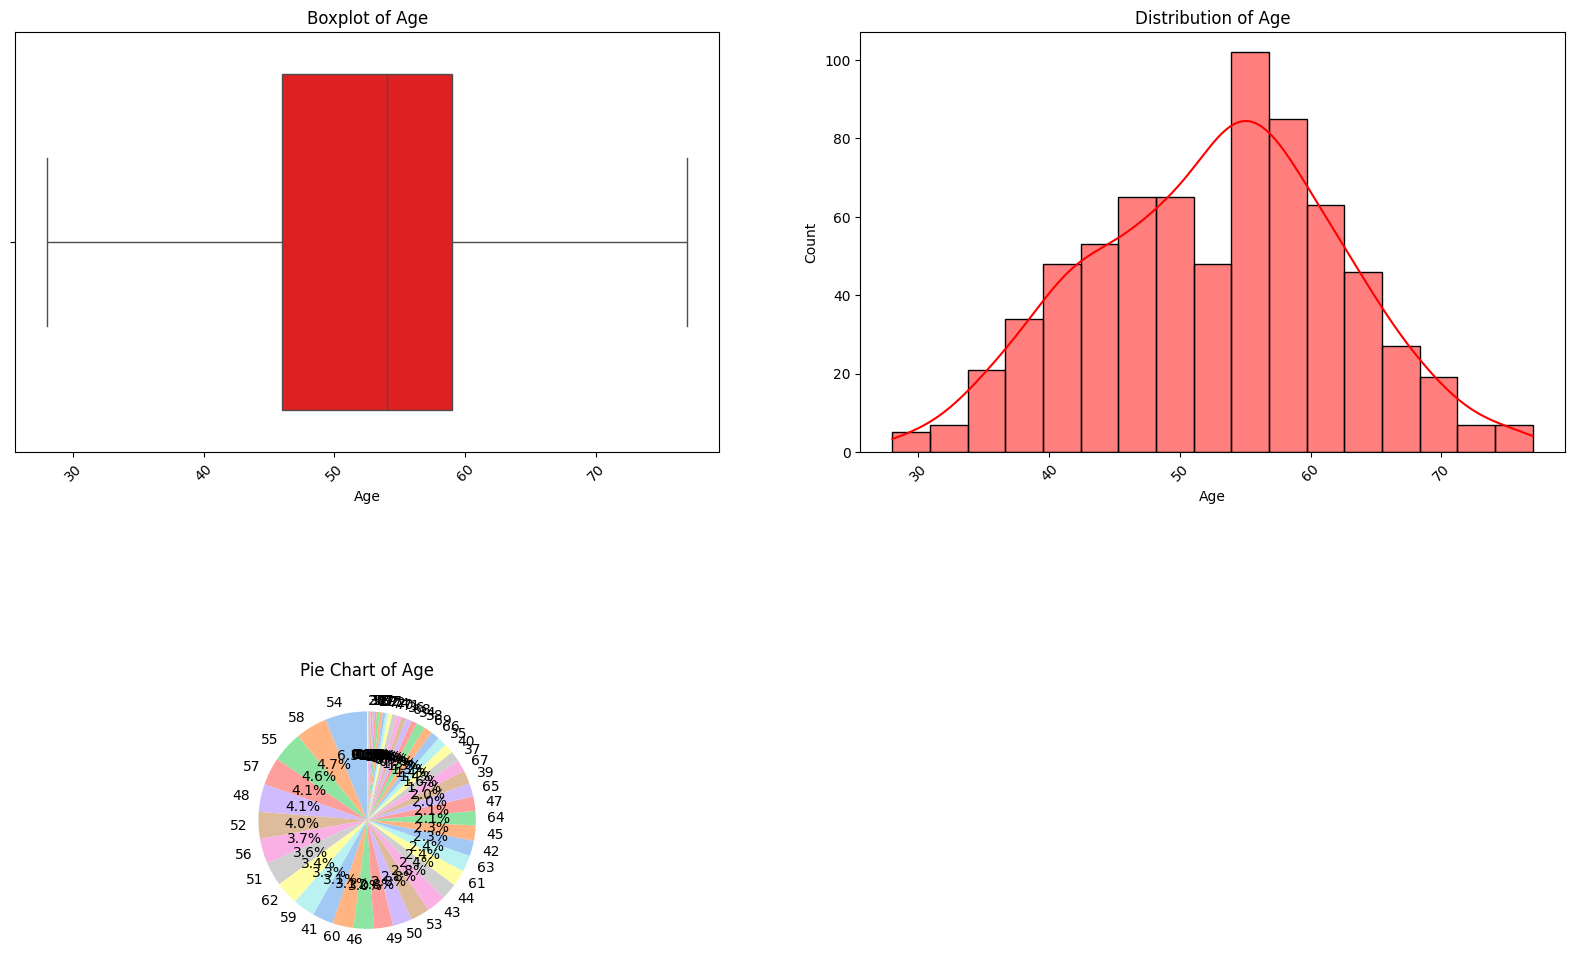

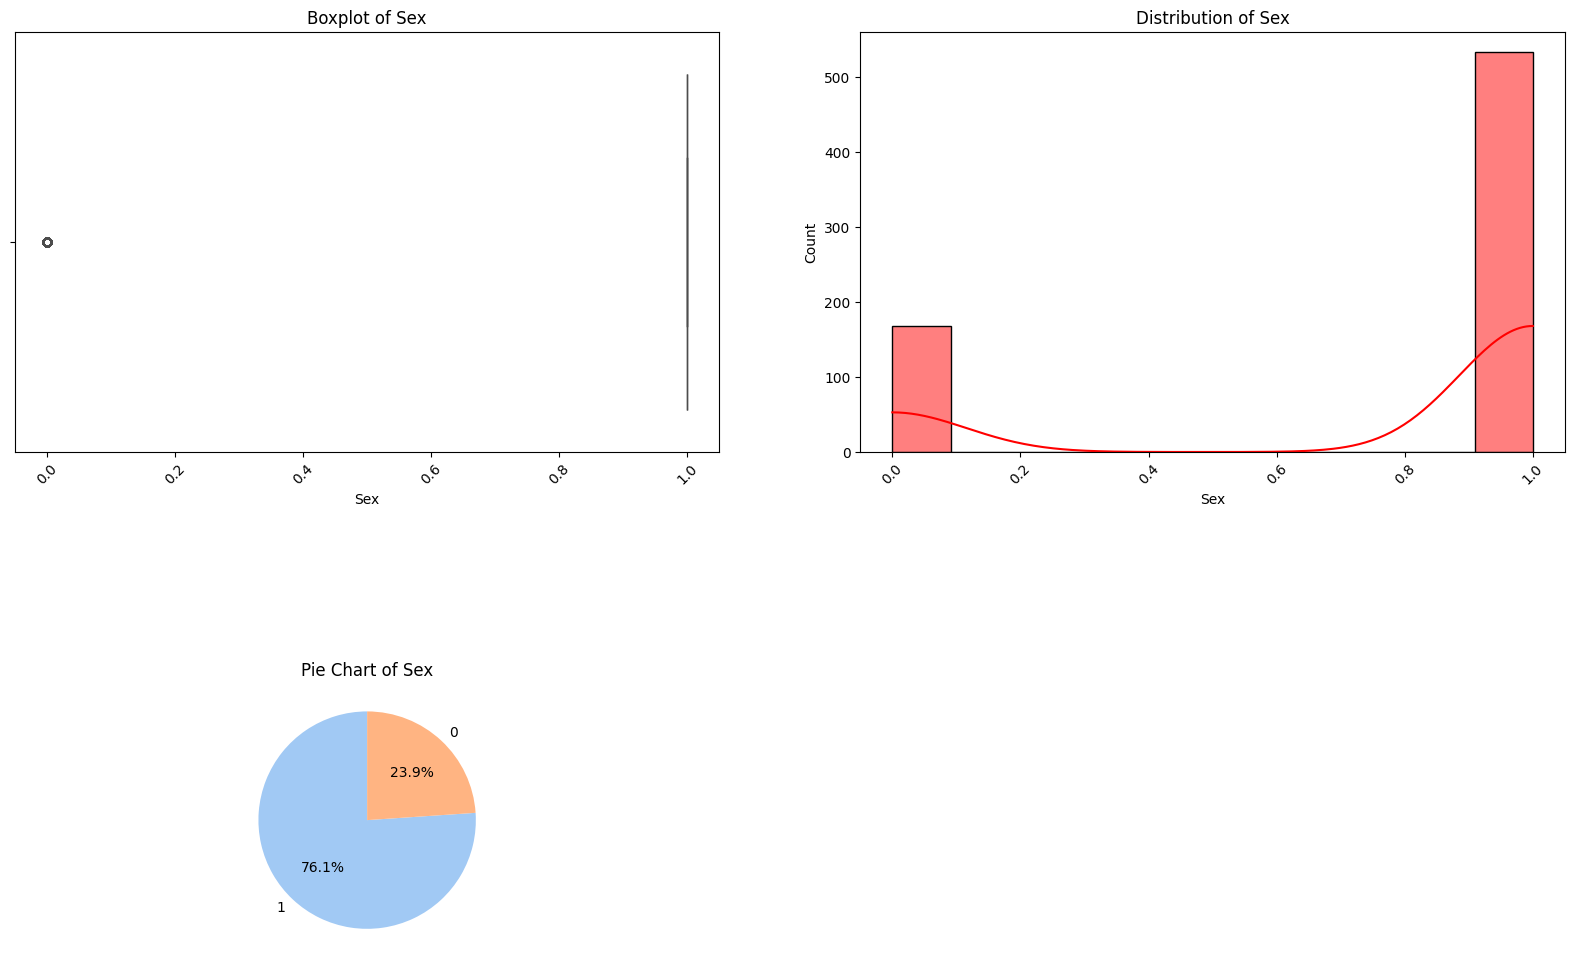

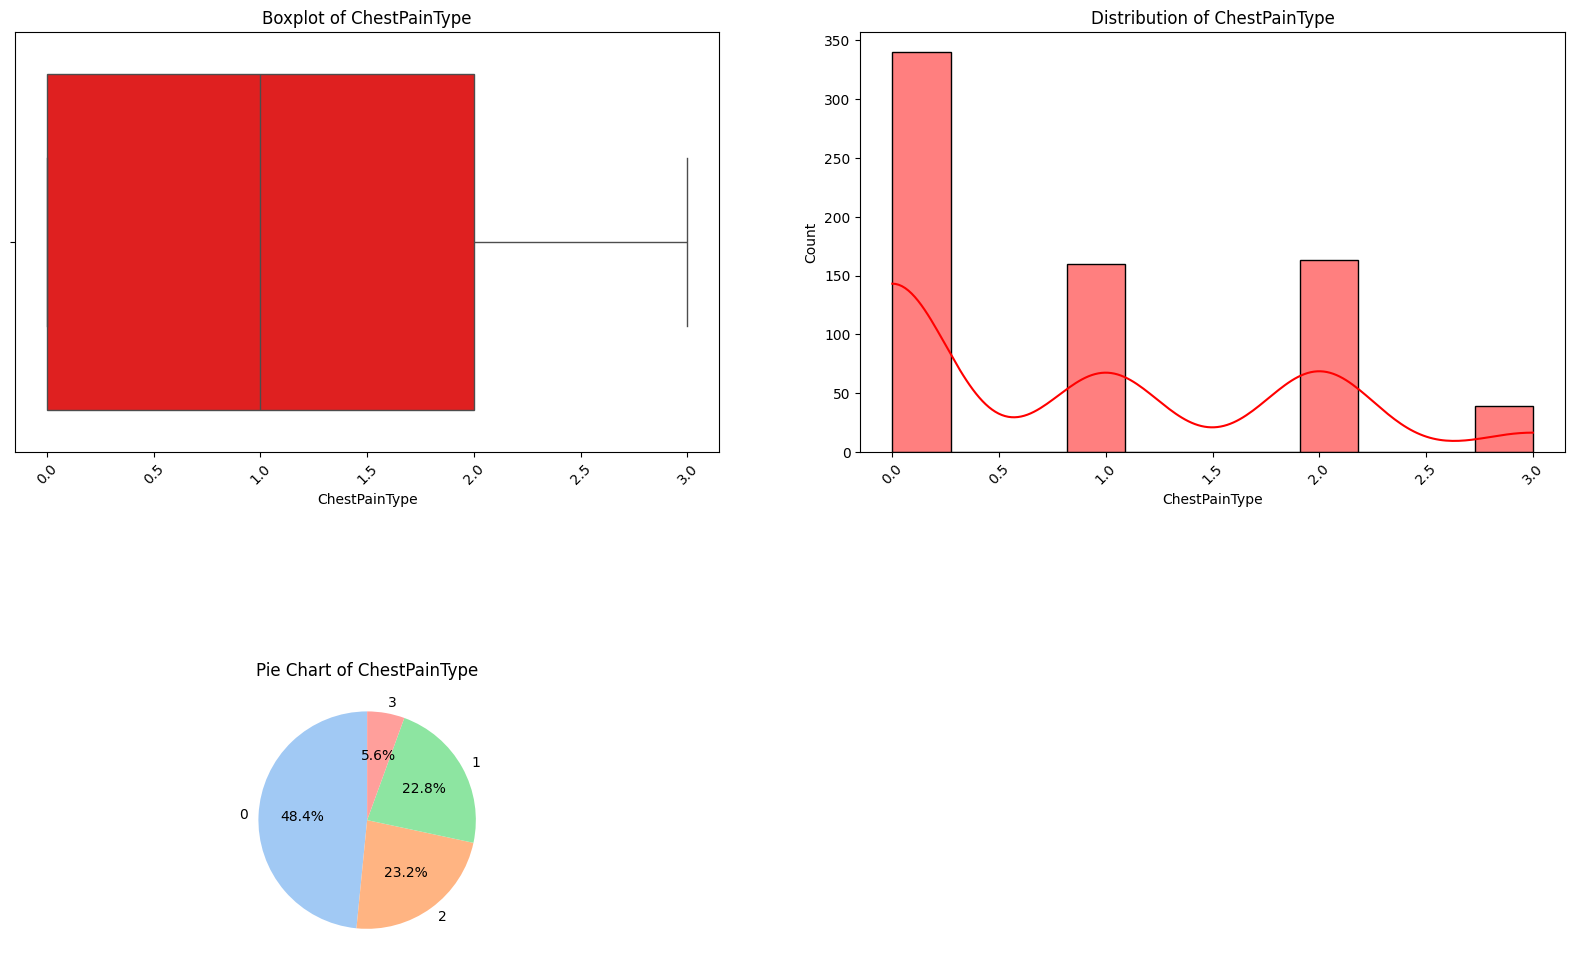

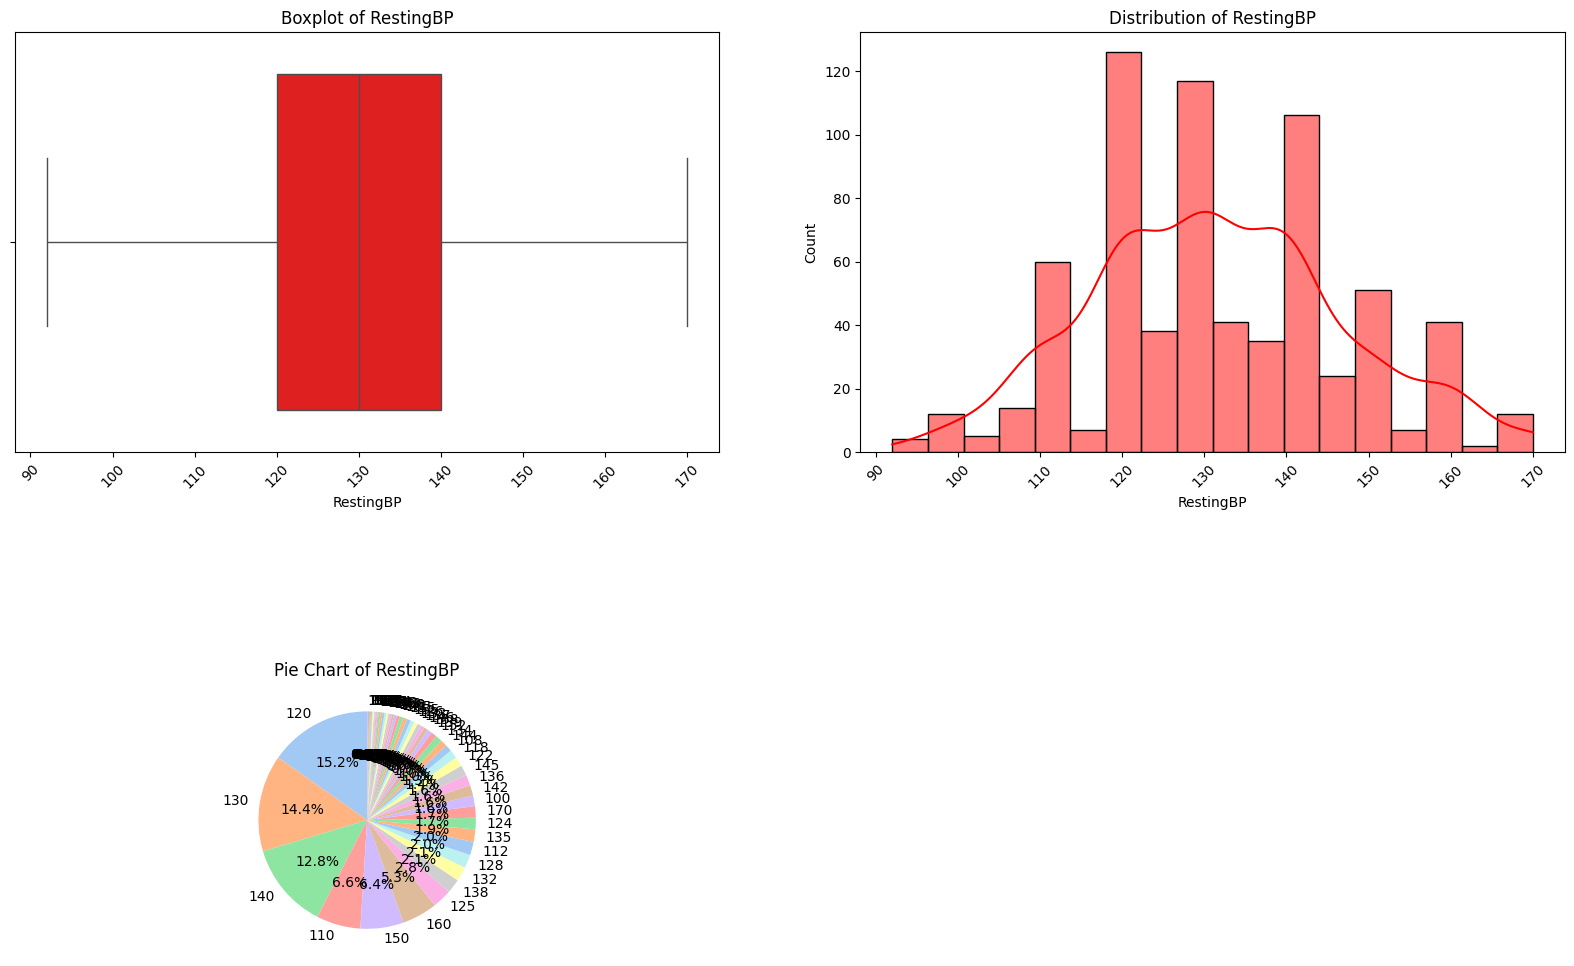

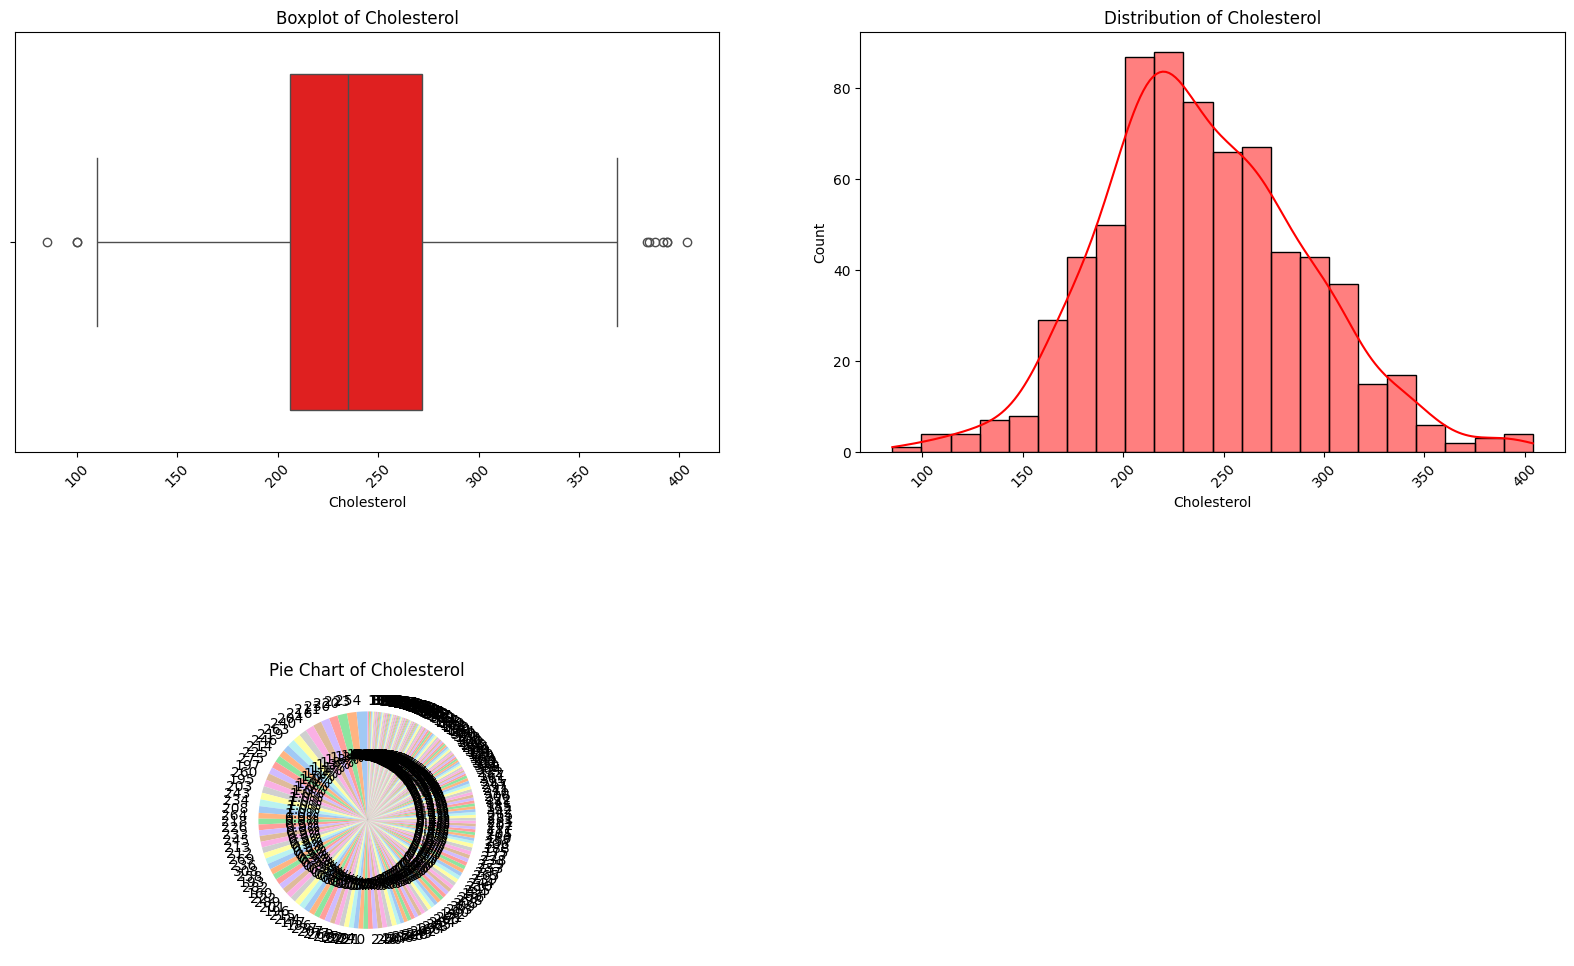

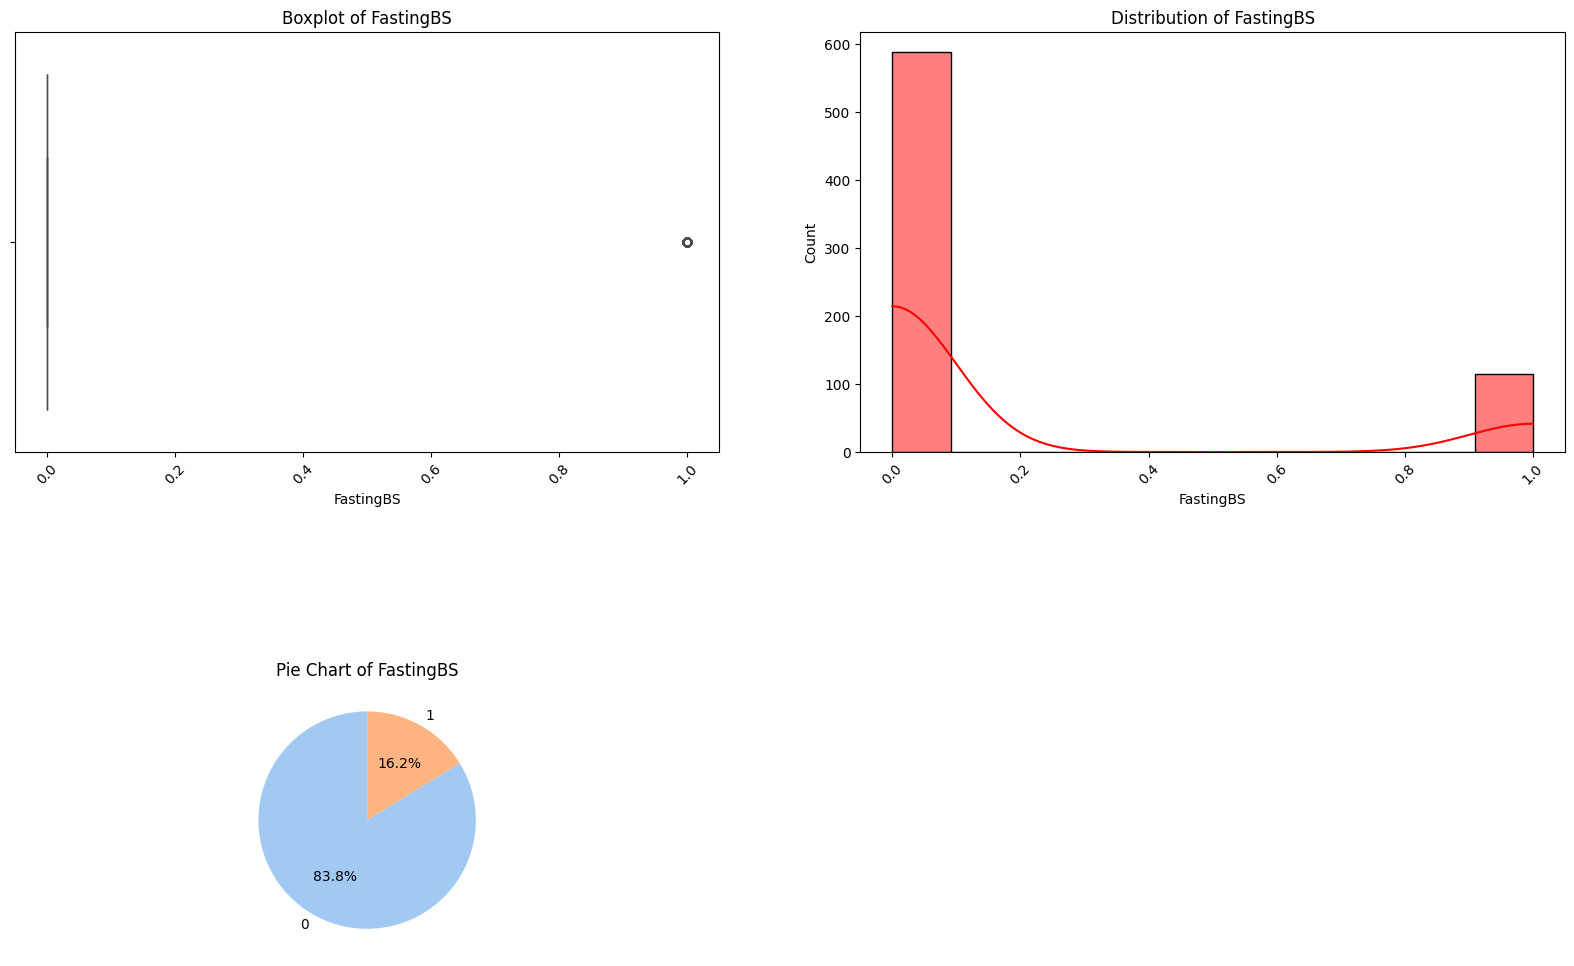

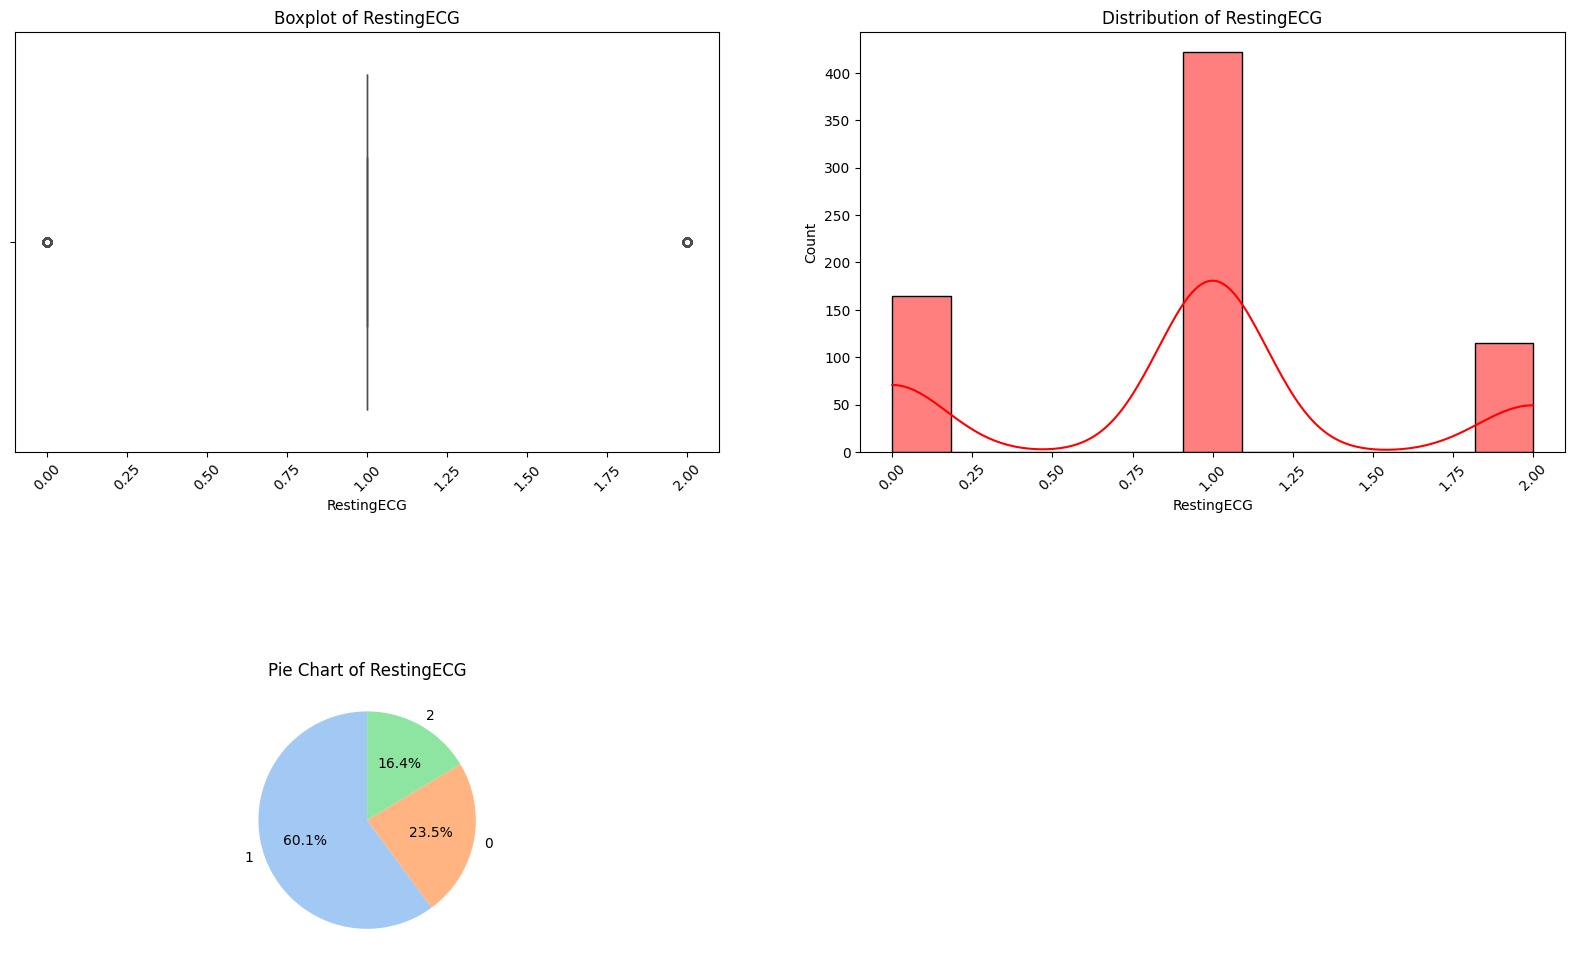

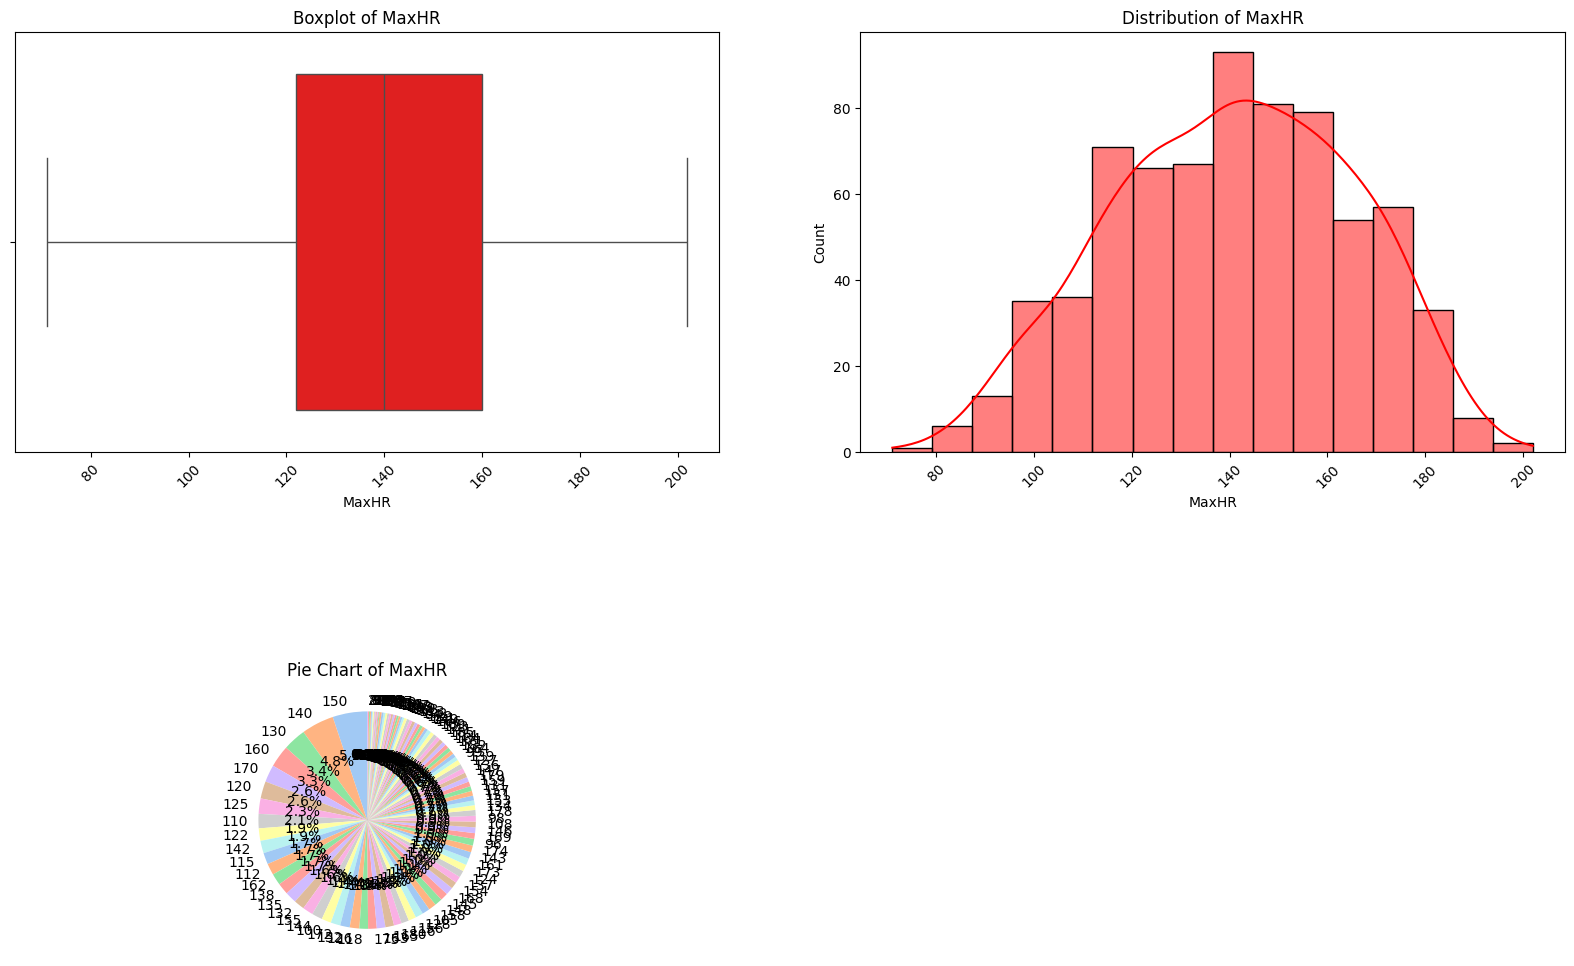

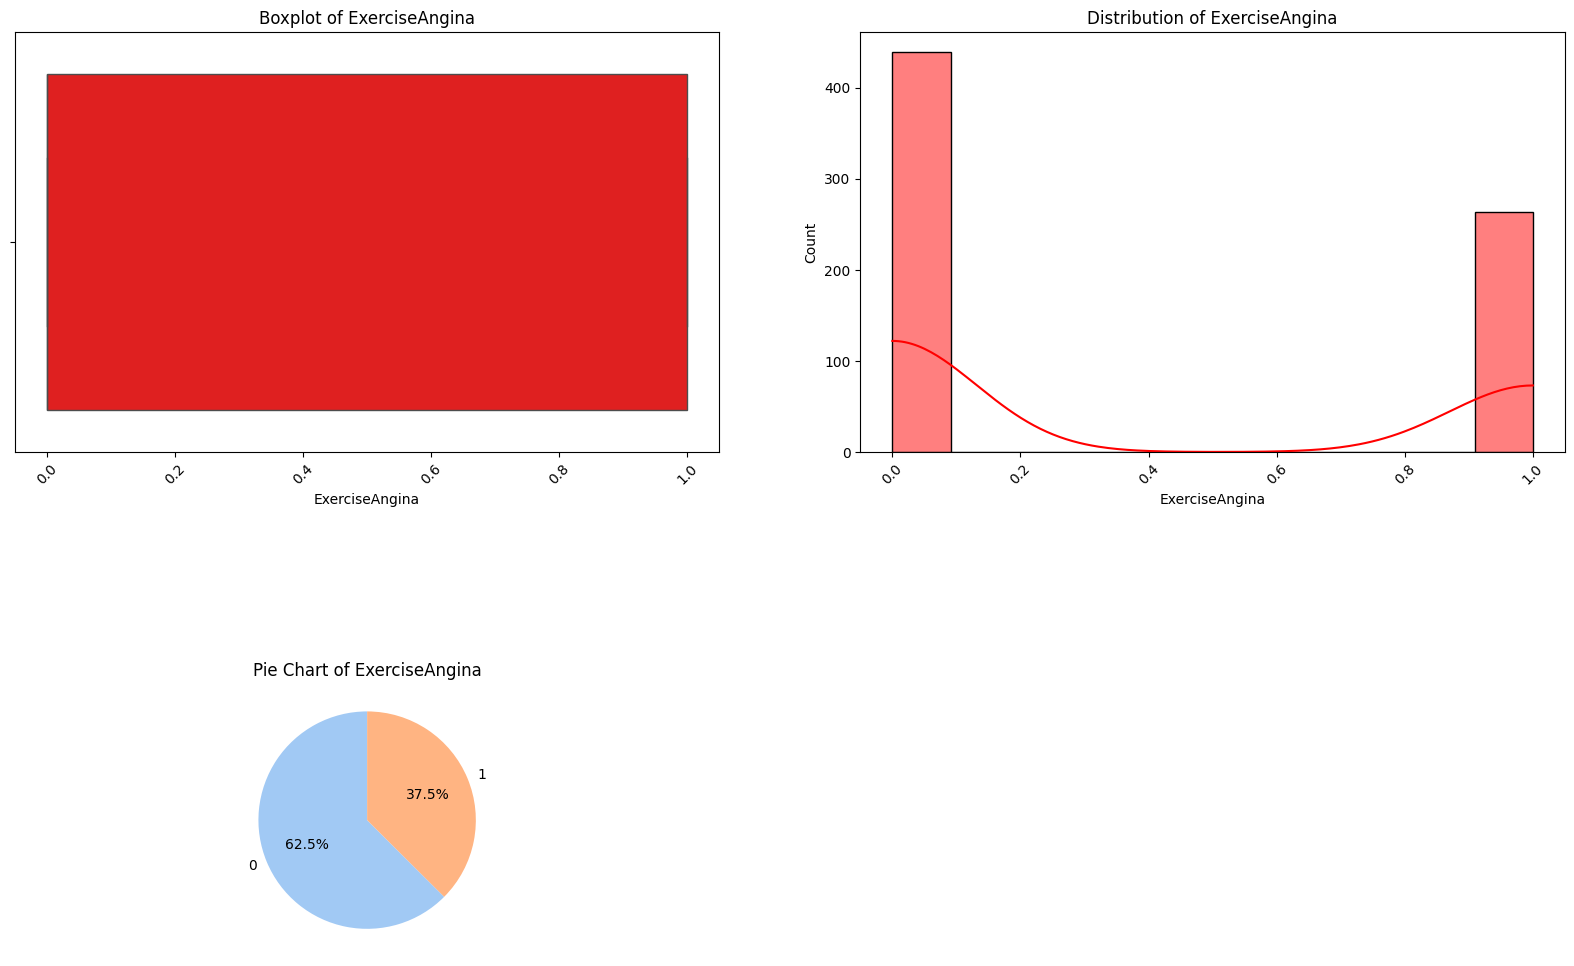

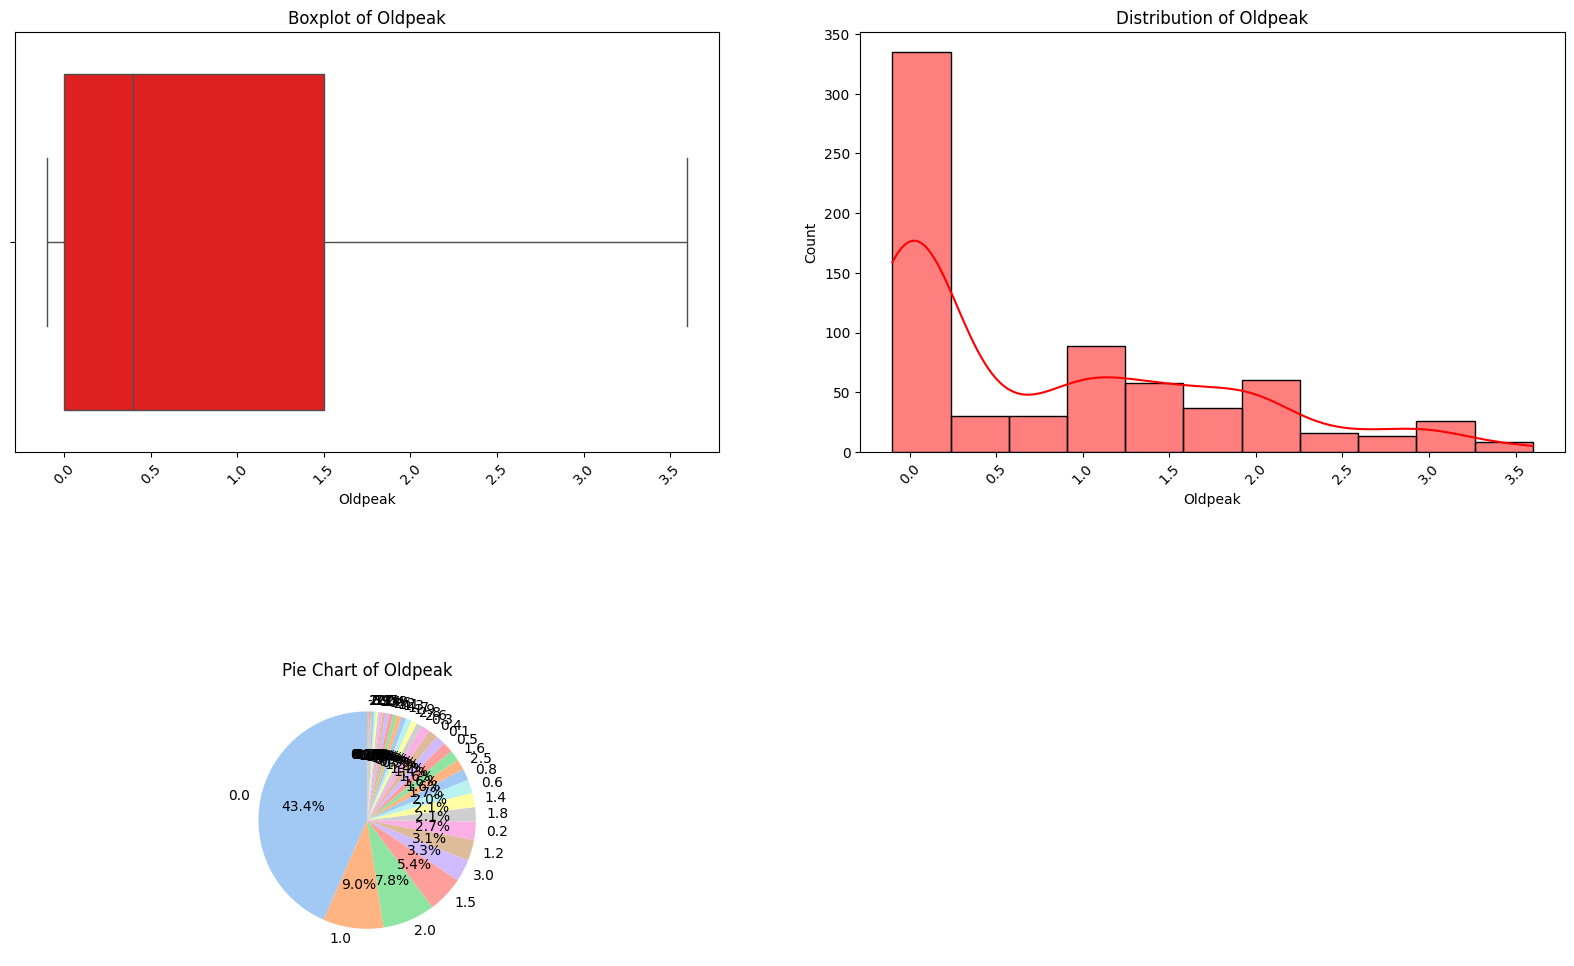

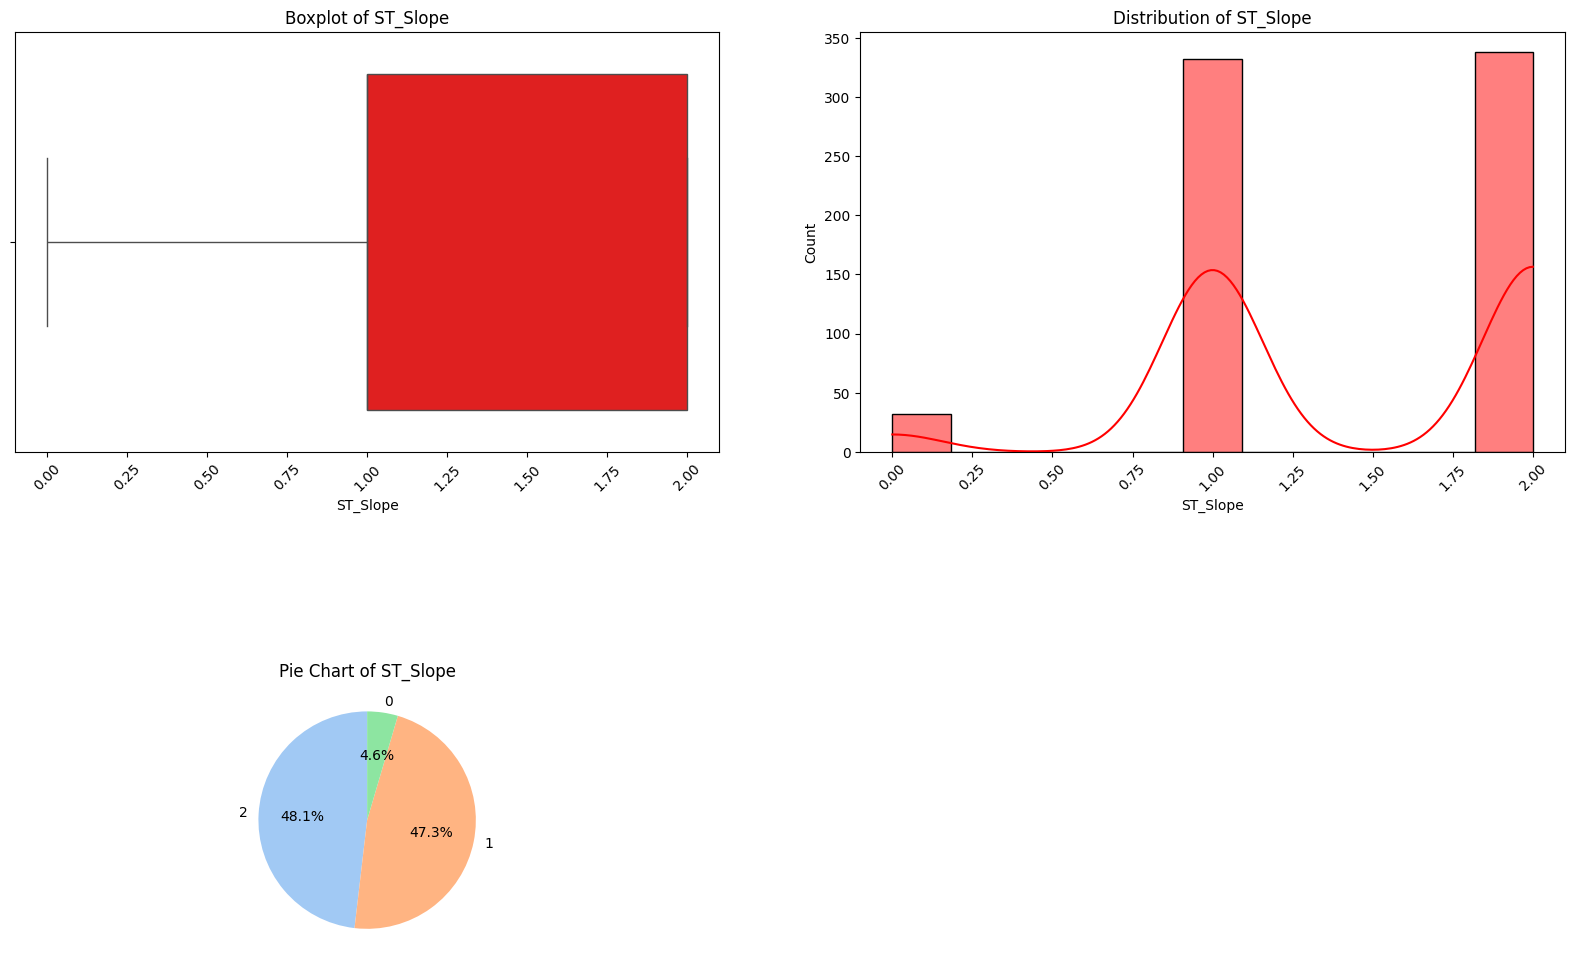

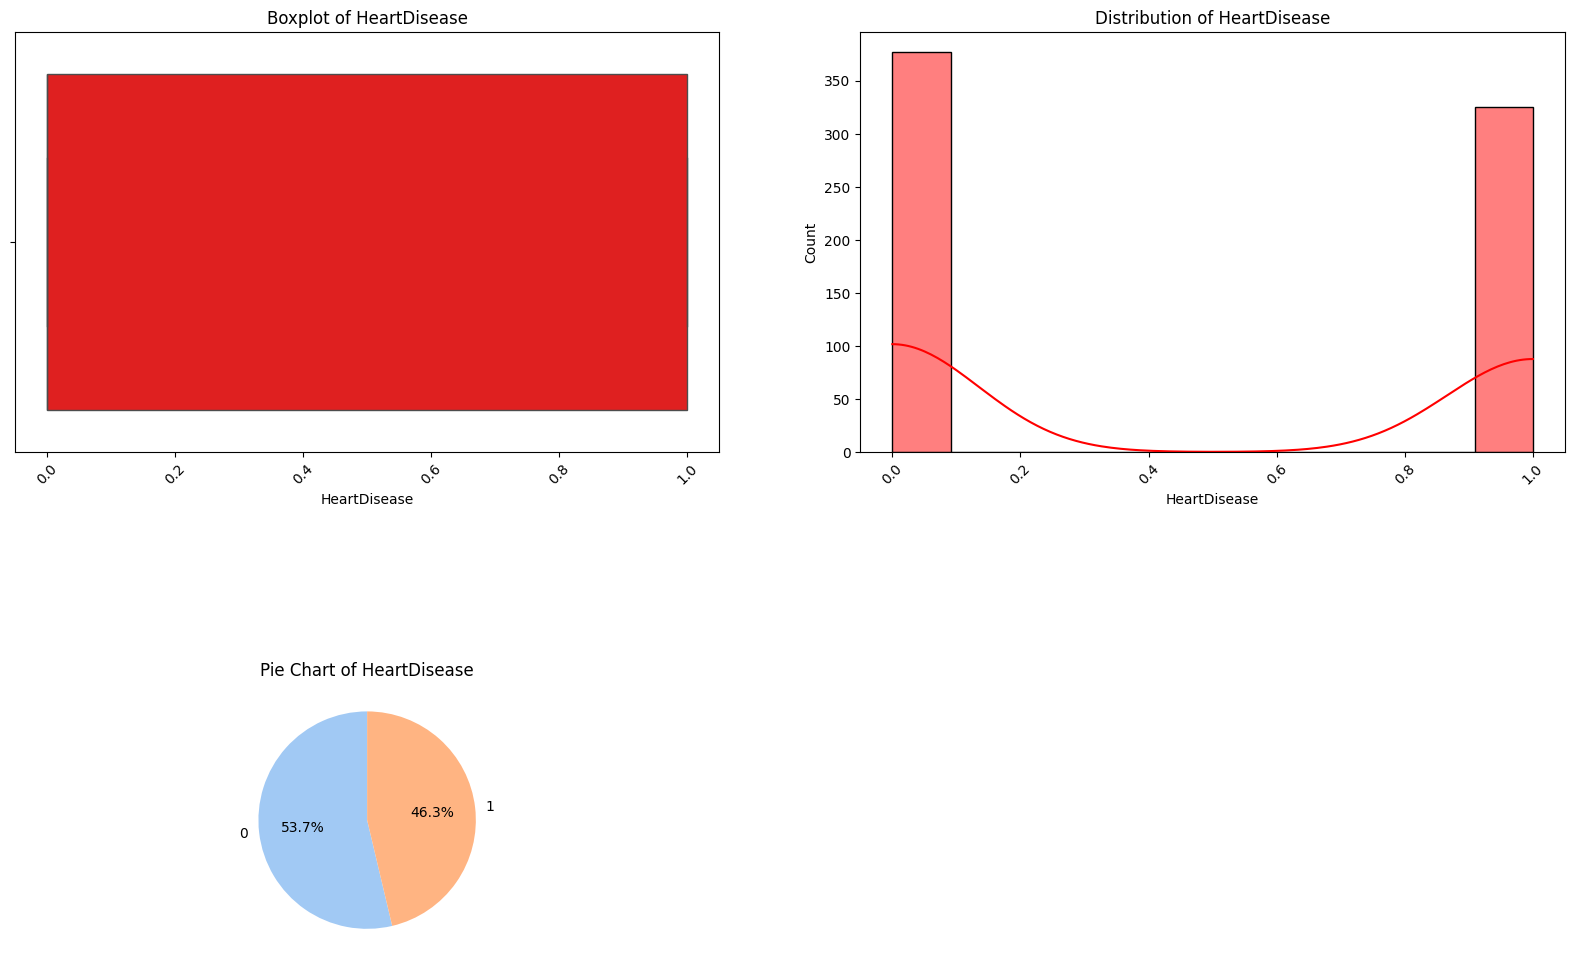

In [87]:
for column in df_cleaned.columns:
    plt.figure(figsize=(20, 12))
    
    # Subplot 1: Boxplot
    plt.subplot(2, 2, 1)
    sns.boxplot(x=df_cleaned[column], color='red')
    plt.title(f'Boxplot of {column}')
    plt.xticks(rotation=45)
    
    # Subplot 2: Distribution Plot (Histogram)
    plt.subplot(2, 2, 2)
    sns.histplot(df_cleaned[column], color='red', kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    
    # Subplot 5: Pie Chart (for proportions of unique values)
    plt.subplot(3, 2, 5)
    unique_counts = df_cleaned[column].value_counts()
    unique_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title(f'Pie Chart of {column}')
    plt.ylabel('') 


    plt.show()

As we can see, most of the continues features are gaussian distributed, except for the 'OldPeak' that is shifted left

PCA

In [47]:
corr = df.corr()

this will show all the features that have correlation > 0.5 in absolute value. We will also remove the features with correlation = 1; to remove the correlation of a feature with itself

If we have two features with a correlation of at least 90%, then these features are so alike that they can be reduced into one featues using PCA

In [48]:
mask = (abs(corr) > 0.5) & (abs(corr) != 1)
corr.where(mask).stack().sort_values()

ST_Slope      HeartDisease   -0.558771
HeartDisease  ST_Slope       -0.558771
Oldpeak       ST_Slope       -0.501921
ST_Slope      Oldpeak        -0.501921
dtype: float64

As we can see, our largest correlation is 55%, not worth it, we will directly standaradize the data and apply PCA with two principle components as required

In [22]:
df_pca1 = df_cleaned.copy()
df_pca1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
697,45,1,3,110,264,0,1,132,0,1.2,1,1
698,68,1,0,144,193,1,1,141,0,3.4,1,1
699,57,1,0,130,131,0,1,115,1,1.2,1,1
700,57,0,1,130,236,0,0,174,0,0.0,1,1


In [23]:
scaler = StandardScaler()
data_scaled1 = scaler.fit_transform(df_pca1)

In [24]:
pca1 = PCA(n_components=2)
principal_components = pca1.fit_transform(data_scaled1)

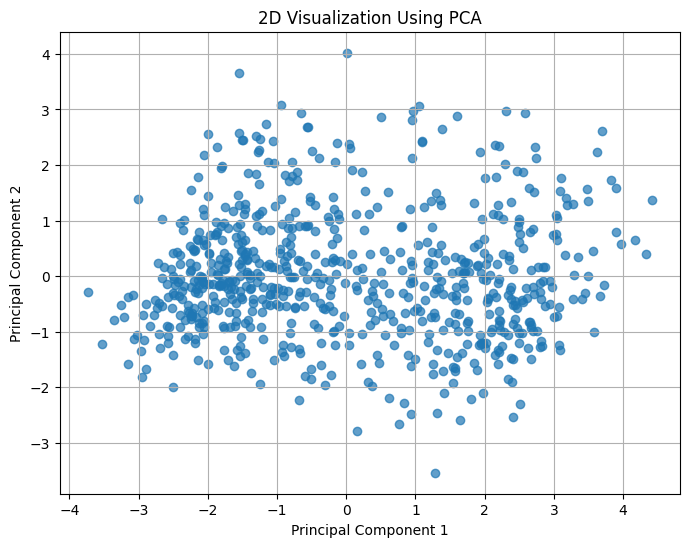

In [25]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.title('2D Visualization Using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [26]:
pca_df

,PC1,PC2
0,-2.069748,-0.100430
1,-0.268647,1.070978
2,-1.211779,-0.649158
3,1.746152,-0.847887
4,-1.261589,1.112300
...,...,...
697,-0.252077,-0.541620
698,2.642690,1.590578
699,2.021982,-1.205075
700,-0.700908,0.283253


Now back to our initial data frame

In [84]:
df_cleaned

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
697,45,1,3,110,264,0,1,132,0,1.2,1,1
698,68,1,0,144,193,1,1,141,0,3.4,1,1
699,57,1,0,130,131,0,1,115,1,1.2,1,1
700,57,0,1,130,236,0,0,174,0,0.0,1,1


As we can see, we have sex with values 0 and 1, resting bp ranging from 130 --> 150 or smth, we will have to normalize our data

So, continuos features like 'Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'; will be normalized

note that old peak isn't gaussian distributed, so it will be normalized instead of standarized

In [102]:
continuous_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']
discrete_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
normalize_feature = ['Oldpeak']

scaler_continuous = StandardScaler()
scaler_normalize = MinMaxScaler()

df_continuous = pd.DataFrame(scaler_continuous.fit_transform(df_cleaned[continuous_features]), columns=continuous_features)
df_oldpeak_normalized = pd.DataFrame(scaler_normalize.fit_transform(df_cleaned[normalize_feature]), columns=normalize_feature)
df_discrete = df_cleaned[discrete_features]

df_stand = pd.concat([df_continuous, df_oldpeak_normalized, df_discrete], axis=1)
df_stand

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,-1.335169,0.547914,0.973199,1.291925,0.027027,1,1,0,1,0,2,0
1,-0.390639,1.845825,-1.178909,0.634669,0.297297,0,2,0,1,0,1,1
2,-1.650013,-0.101041,0.854735,-1.747885,0.027027,1,1,0,2,0,2,0
3,-0.495587,0.418123,-0.507609,-1.337100,0.432432,0,0,0,1,1,1,1
4,0.134100,1.196870,-0.882748,-0.762001,0.027027,1,2,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
697,-0.810430,-1.398952,0.479596,-0.351215,0.351351,1,3,0,1,0,1,1
698,1.603369,0.807496,-0.922236,0.018491,0.945946,1,0,1,1,0,1,1
699,0.448943,-0.101041,-2.146371,-1.049550,0.351351,1,0,0,1,1,1,1
700,0.448943,-0.101041,-0.073239,1.374082,0.027027,0,1,0,0,0,1,1


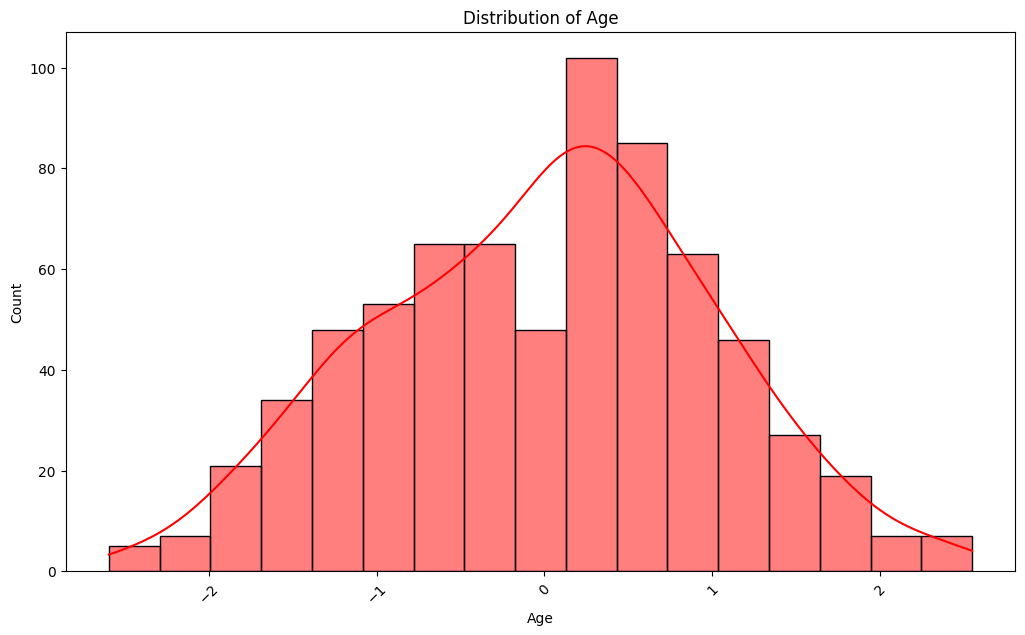

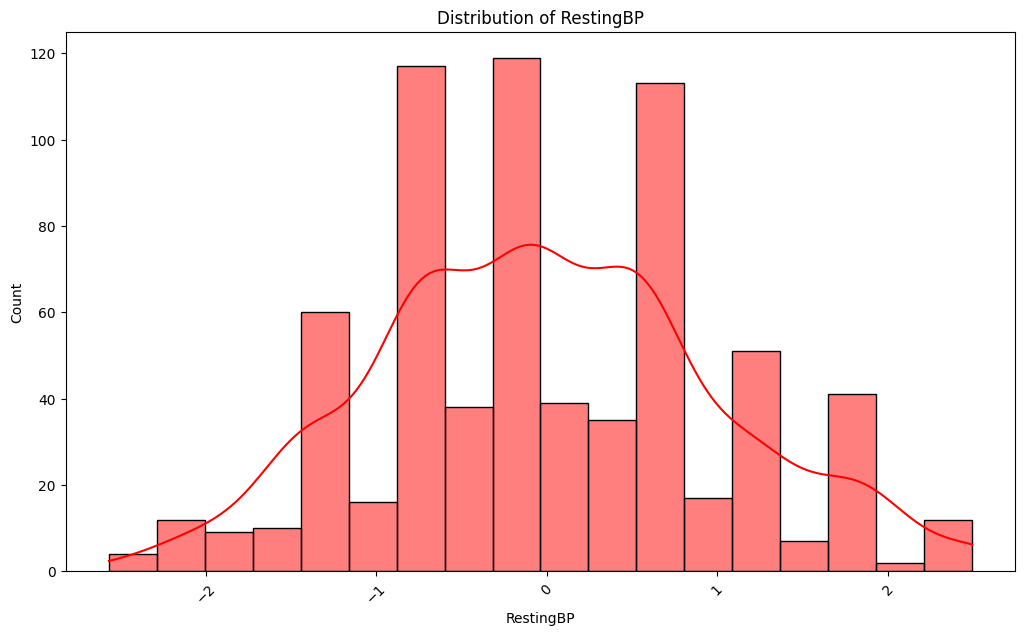

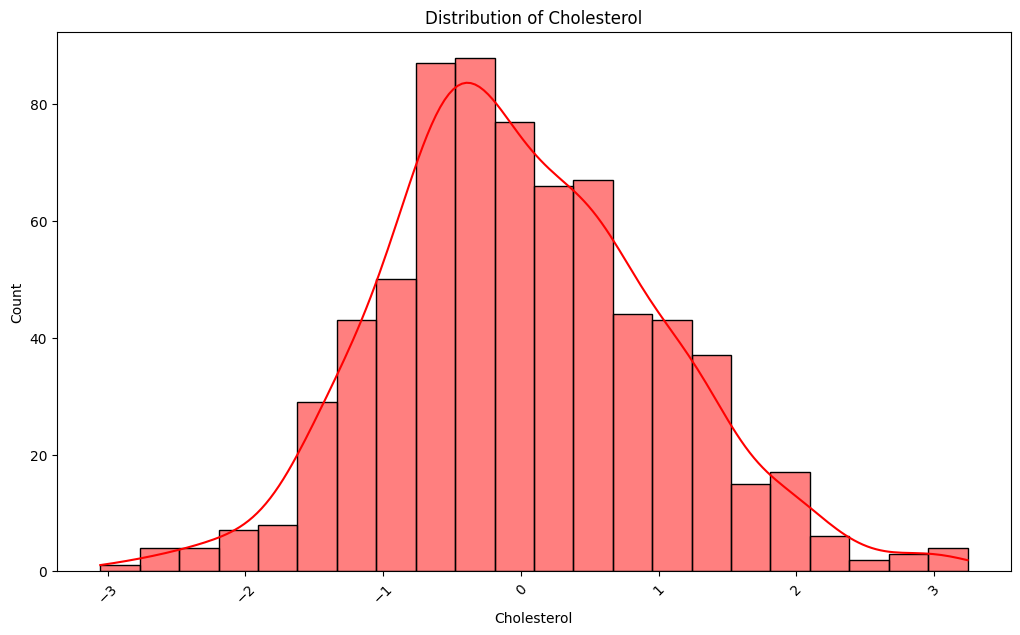

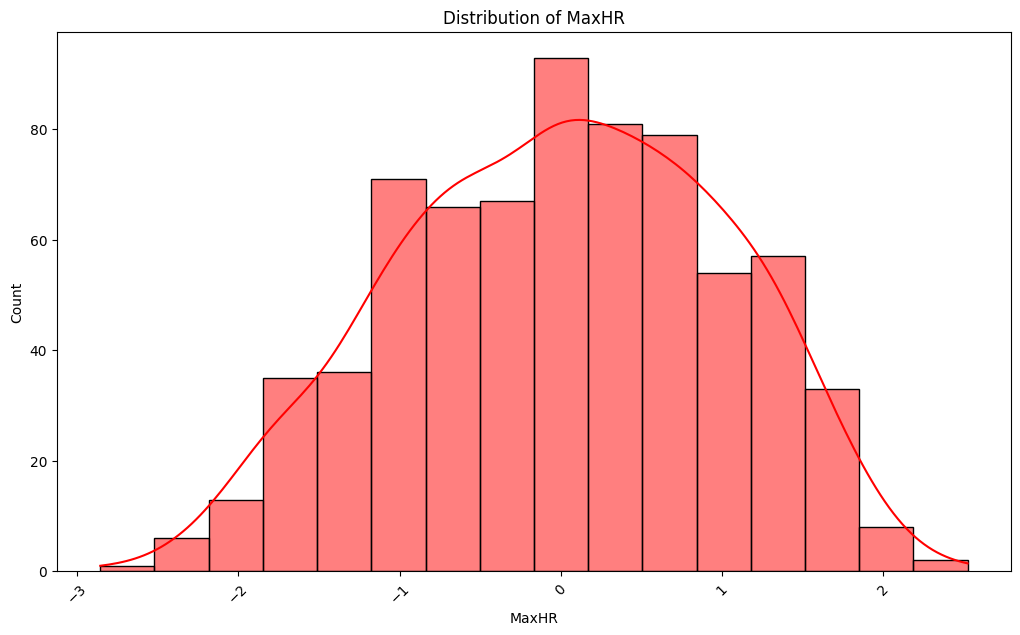

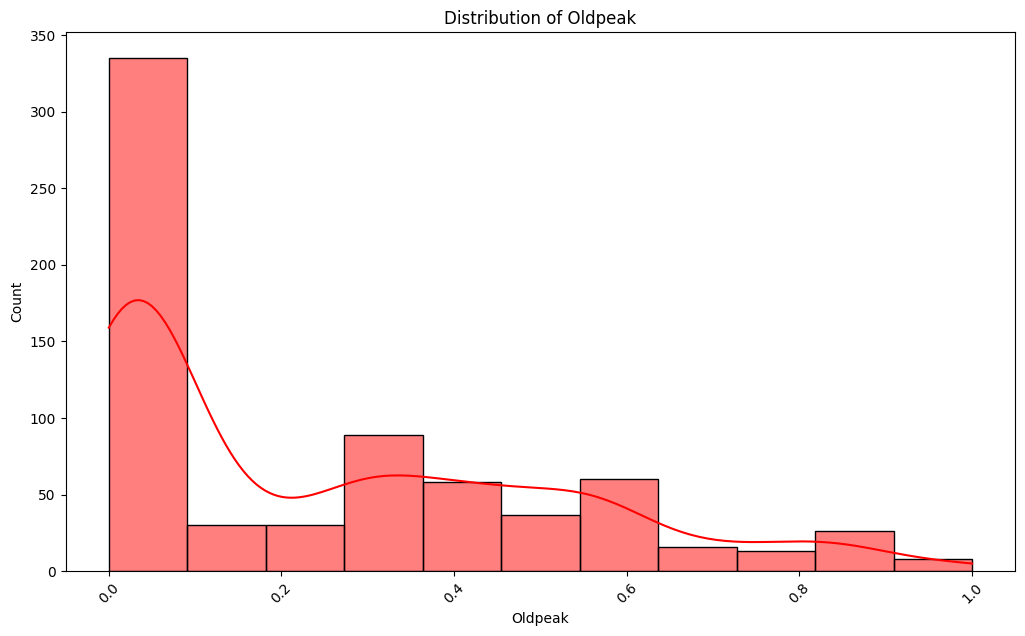

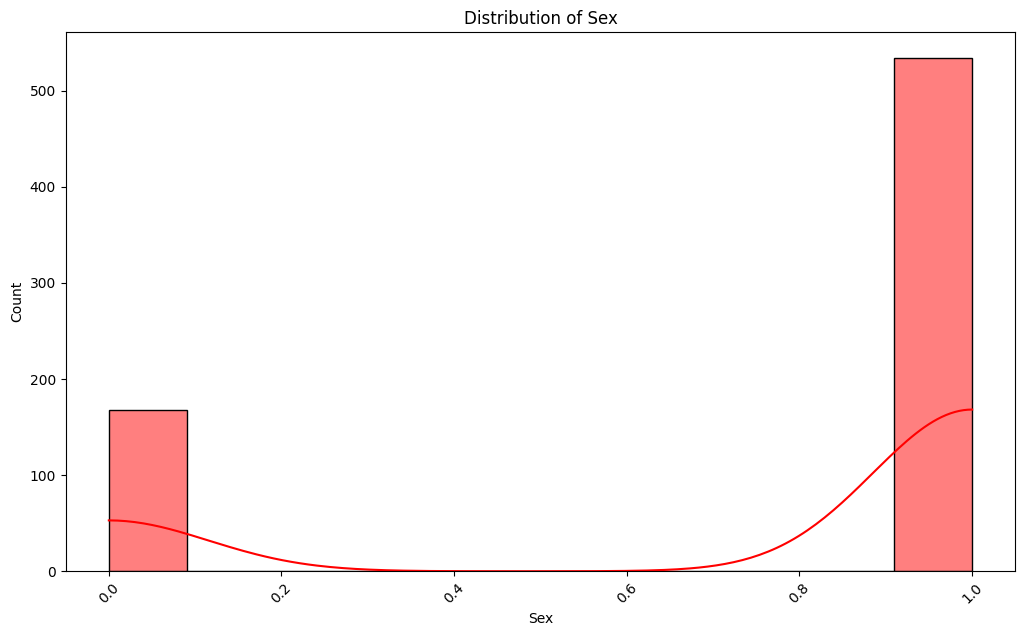

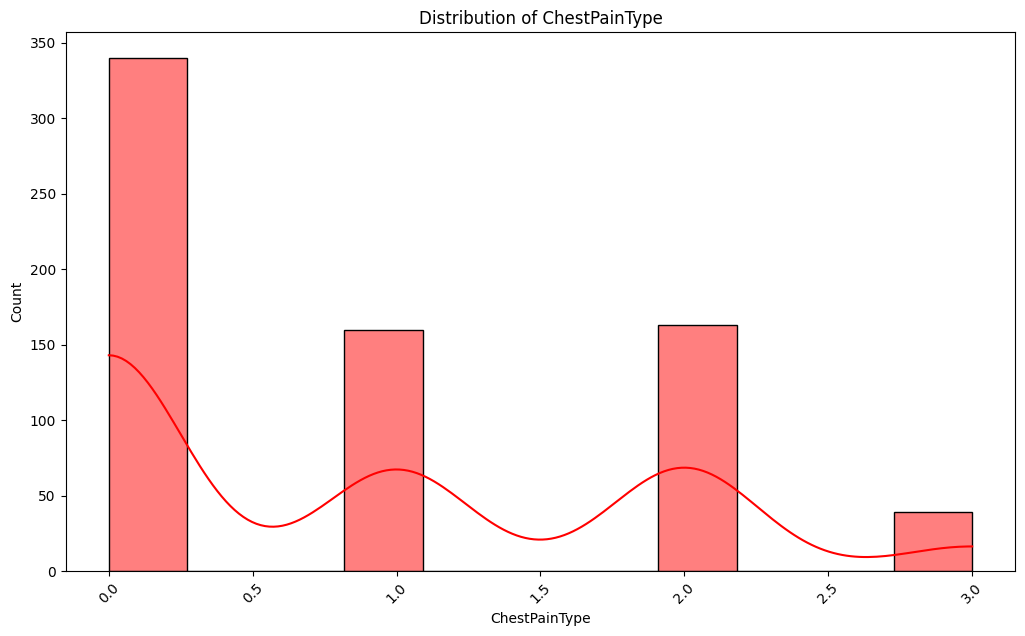

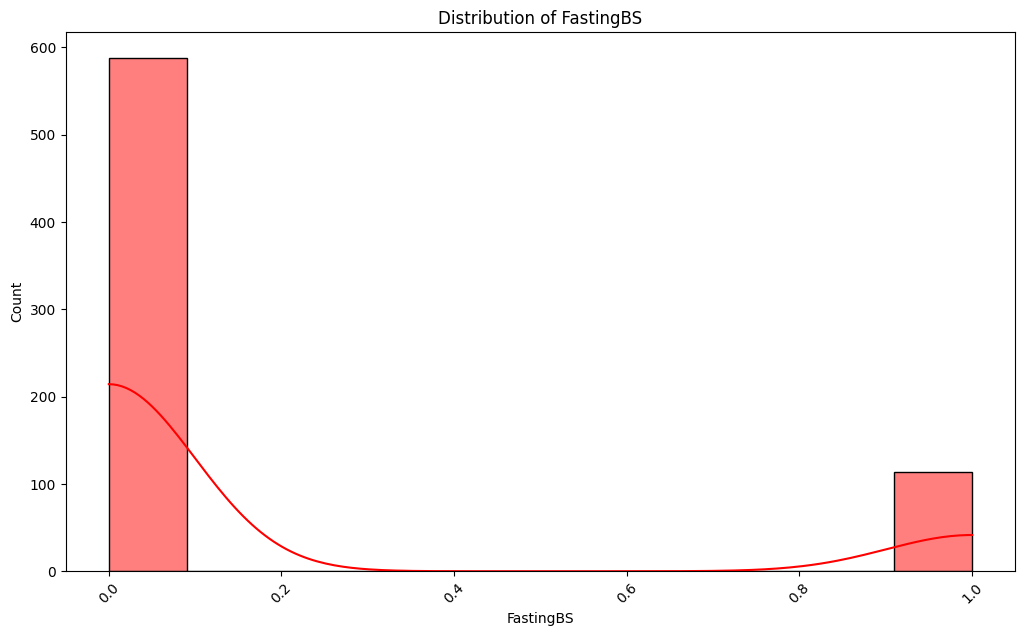

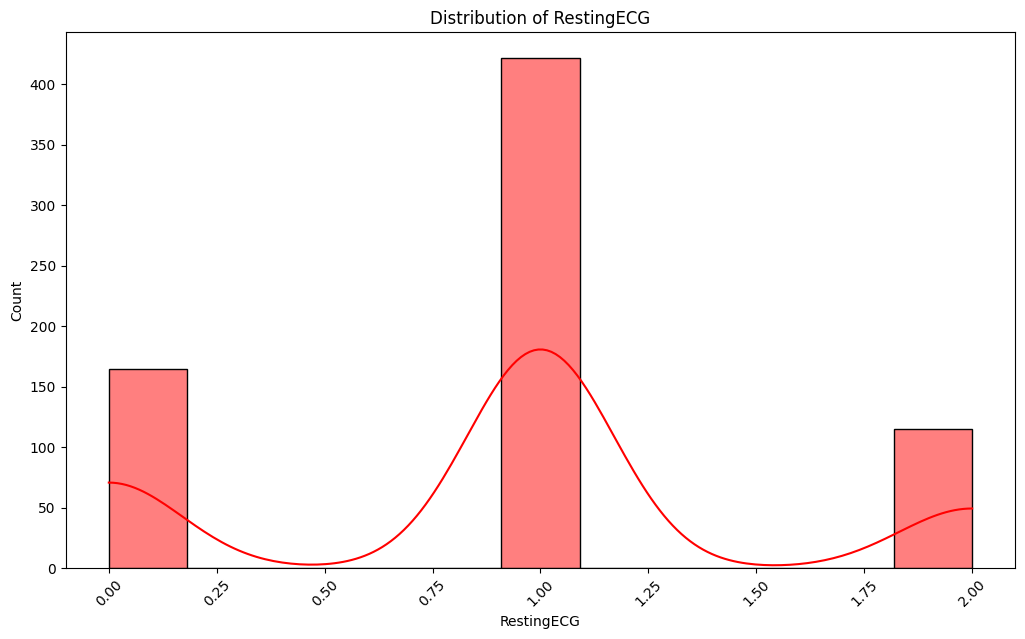

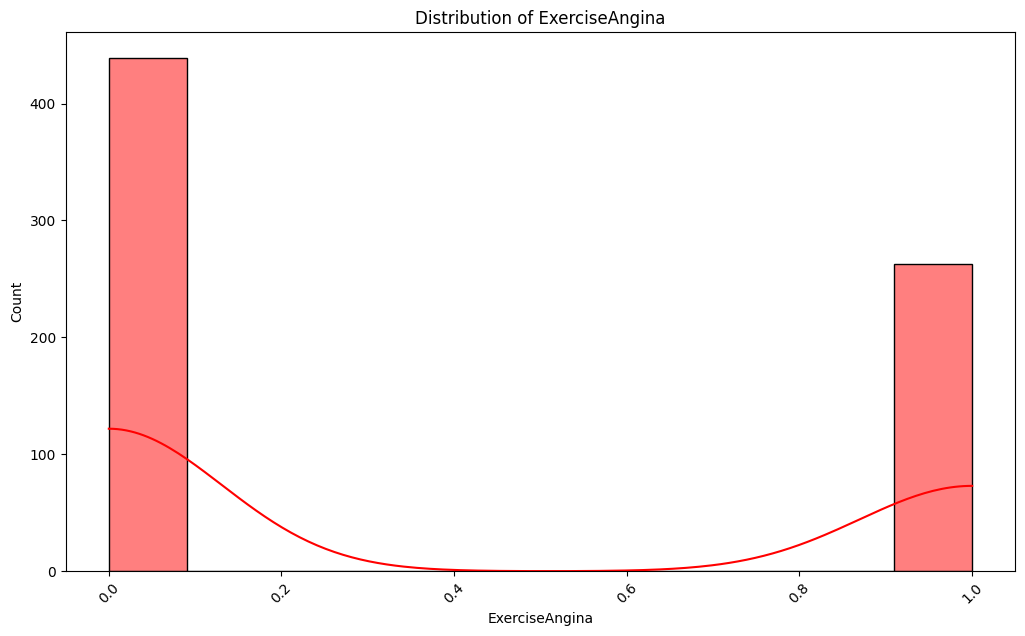

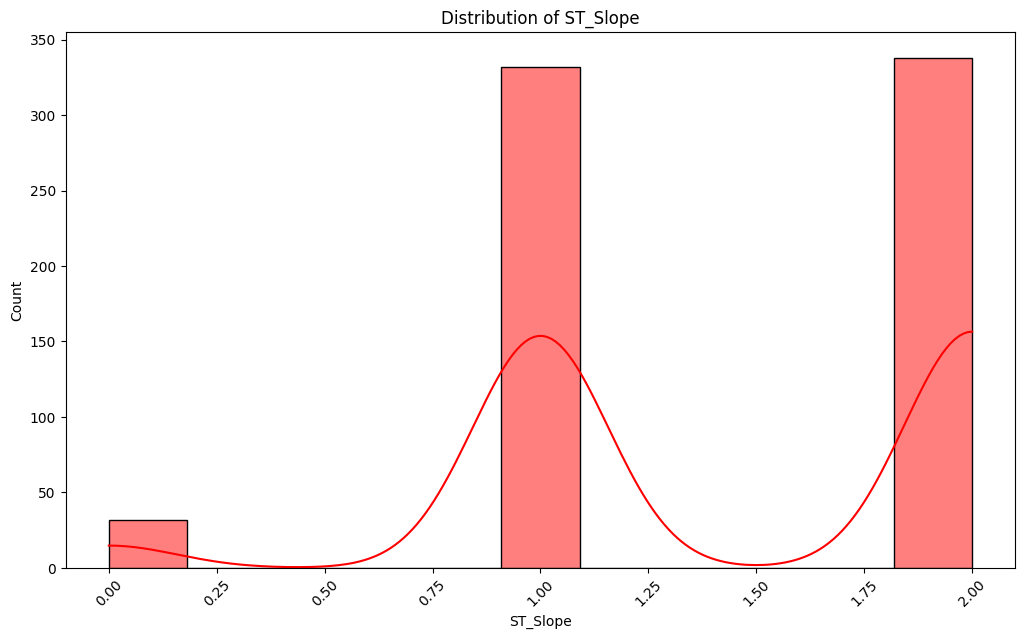

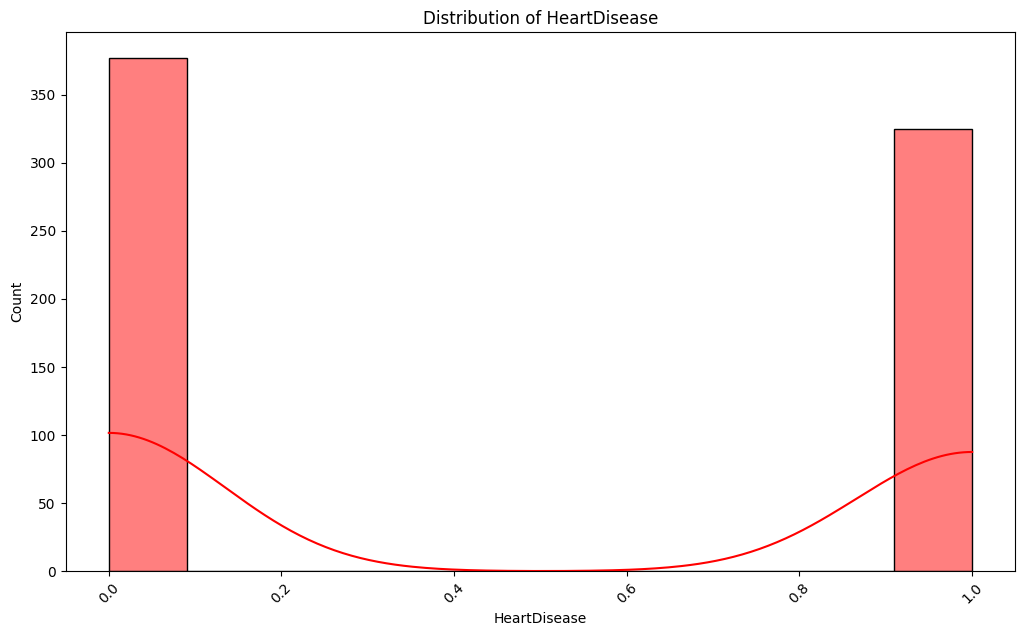

In [103]:
for column in df_stand.columns:
    plt.figure(figsize=(20, 12))
    
    plt.subplot(2, 2, 2)
    sns.histplot(df_stand[column], color='red', kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()

Now we will normalize all the data to range from -1 to 1

In [104]:
continuous_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
discrete_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

scaler_minmax = MinMaxScaler(feature_range=(-1, 1))

#scale continuous features to -1, 1
df_continuous_scaled = scaler_minmax.fit_transform(df_stand[continuous_features])
df_continuous_scaled = pd.DataFrame(df_continuous_scaled, columns=continuous_features)

df_discrete = df_stand[discrete_features]

df_stand2 = pd.concat([df_continuous_scaled, df_discrete], axis=1)

# Check the result
print(df_stand2.head())

        Age  RestingBP  Cholesterol     MaxHR   Oldpeak  Sex  ChestPainType  \
0 -0.510204   0.230769     0.278997  0.541985 -0.945946    1              1   
1 -0.142857   0.743590    -0.404389  0.297710 -0.405405    0              2   
2 -0.632653  -0.025641     0.241379 -0.587786 -0.945946    1              1   
3 -0.183673   0.179487    -0.191223 -0.435115 -0.135135    0              0   
4  0.061224   0.487179    -0.310345 -0.221374 -0.945946    1              2   

   FastingBS  RestingECG  ExerciseAngina  ST_Slope  HeartDisease  
0          0           1               0         2             0  
1          0           1               0         1             1  
2          0           2               0         2             0  
3          0           1               1         1             1  
4          0           1               0         2             0  


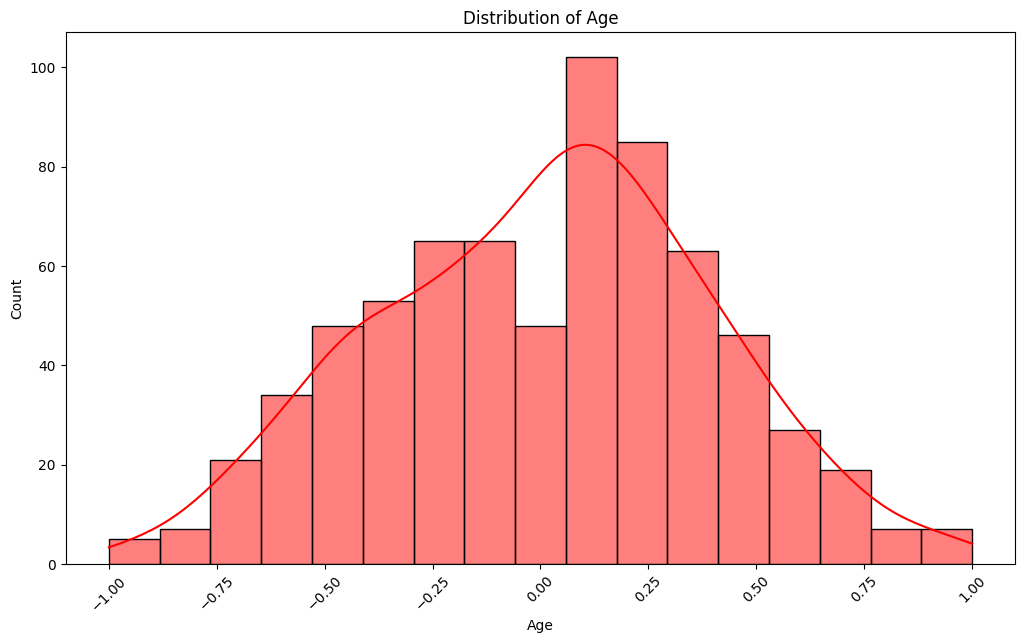

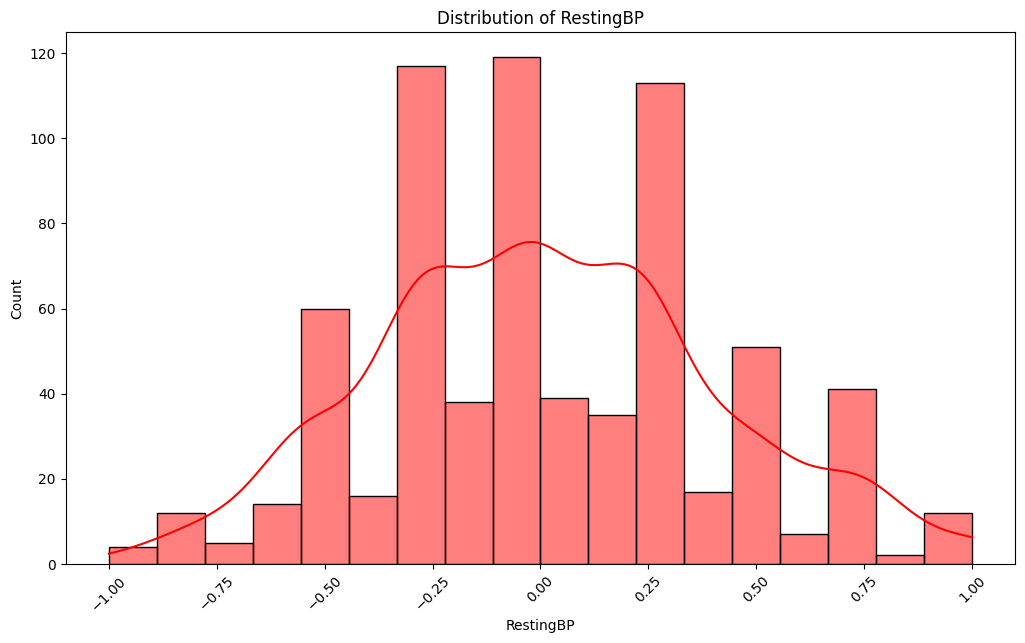

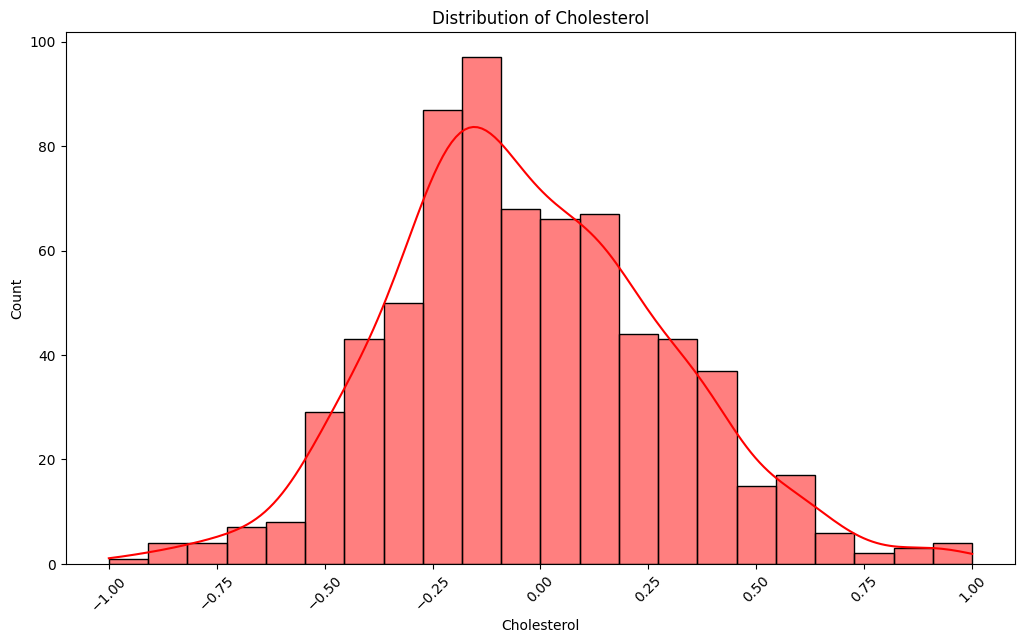

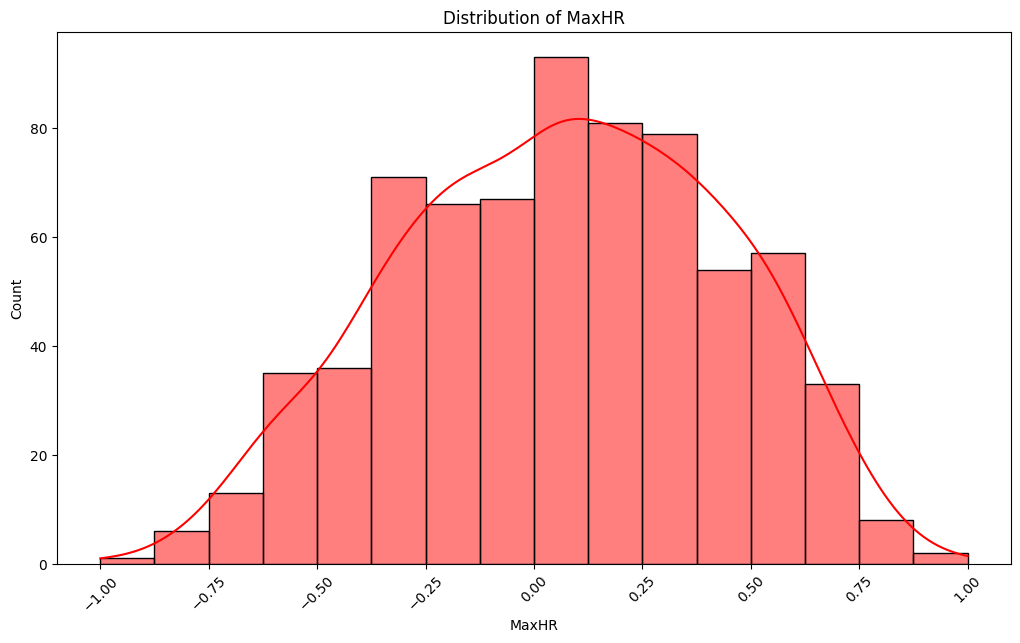

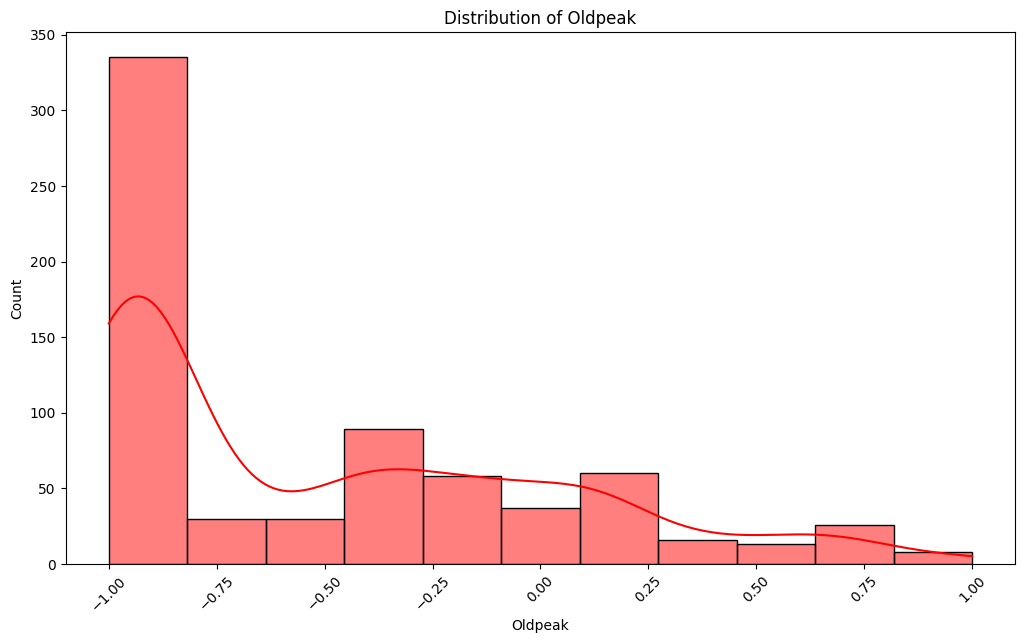

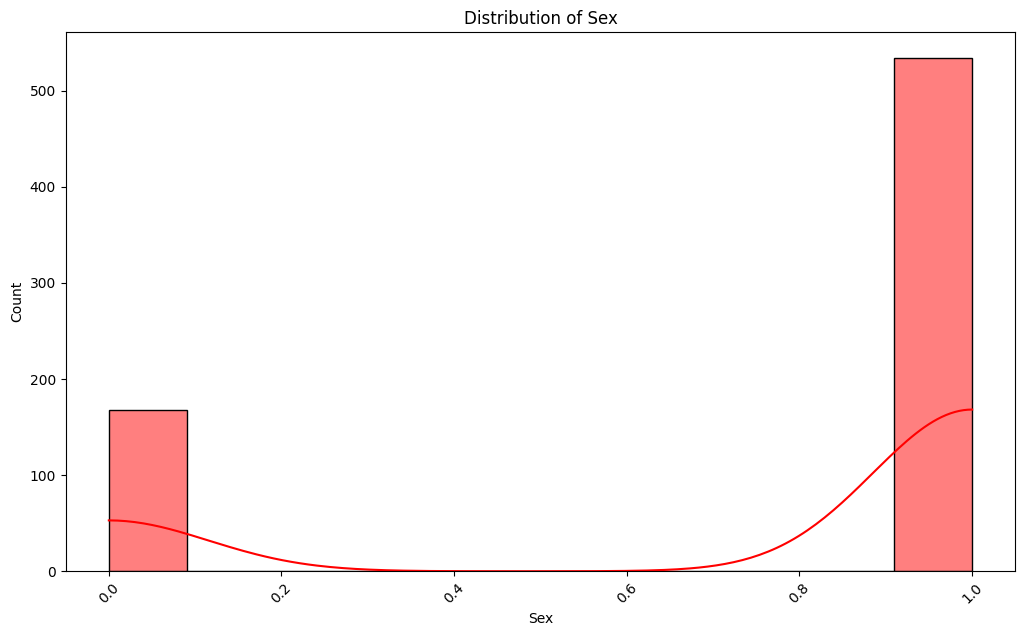

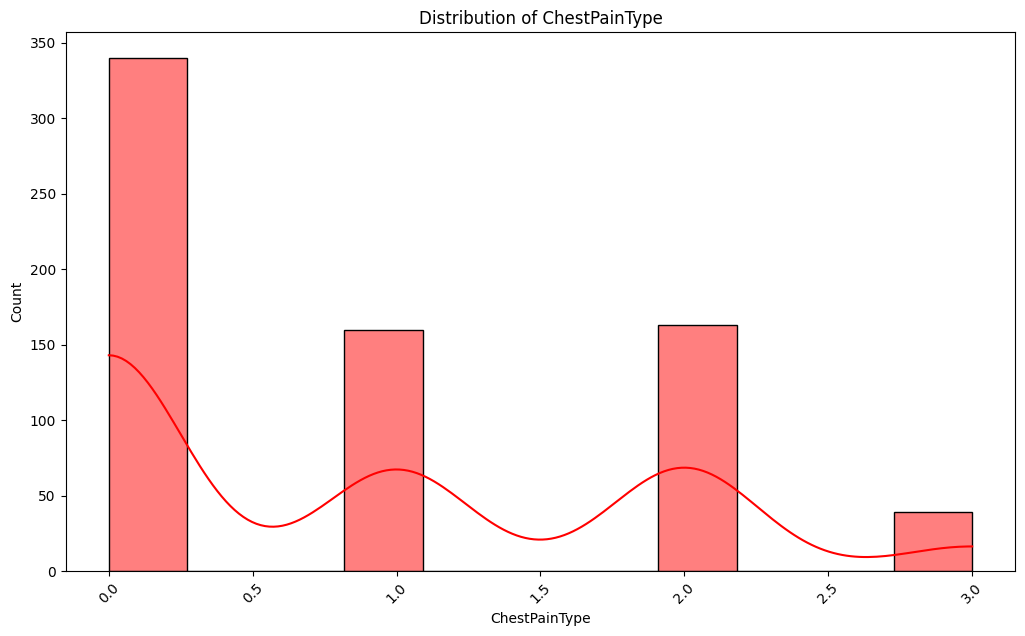

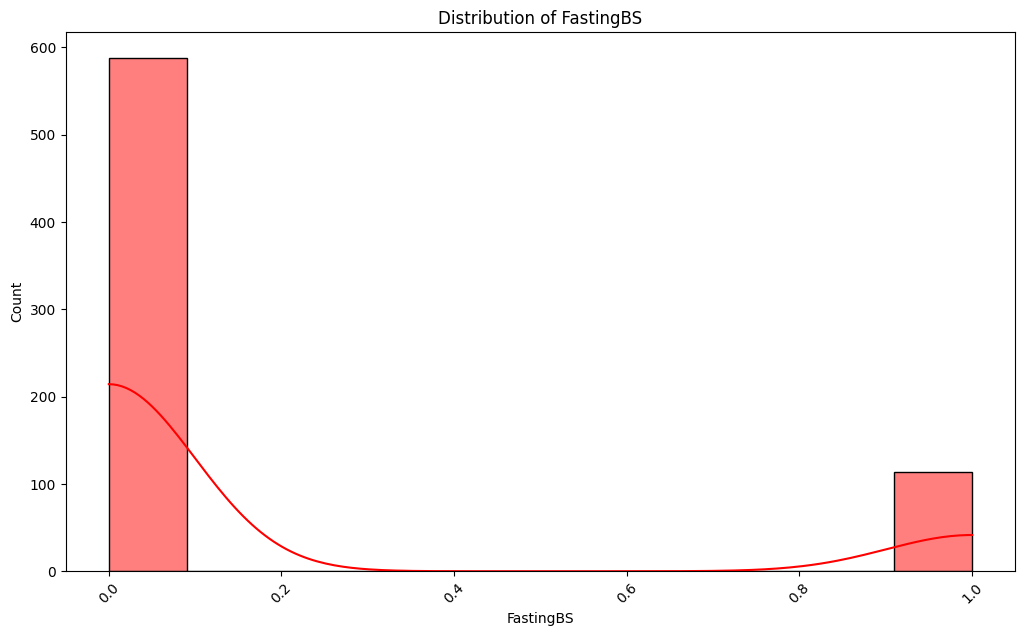

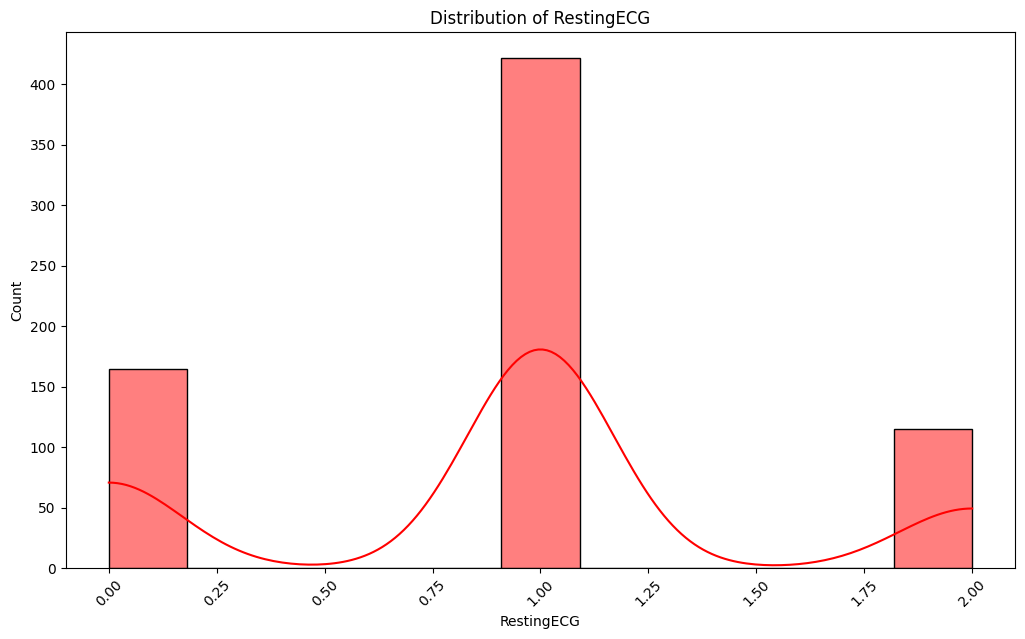

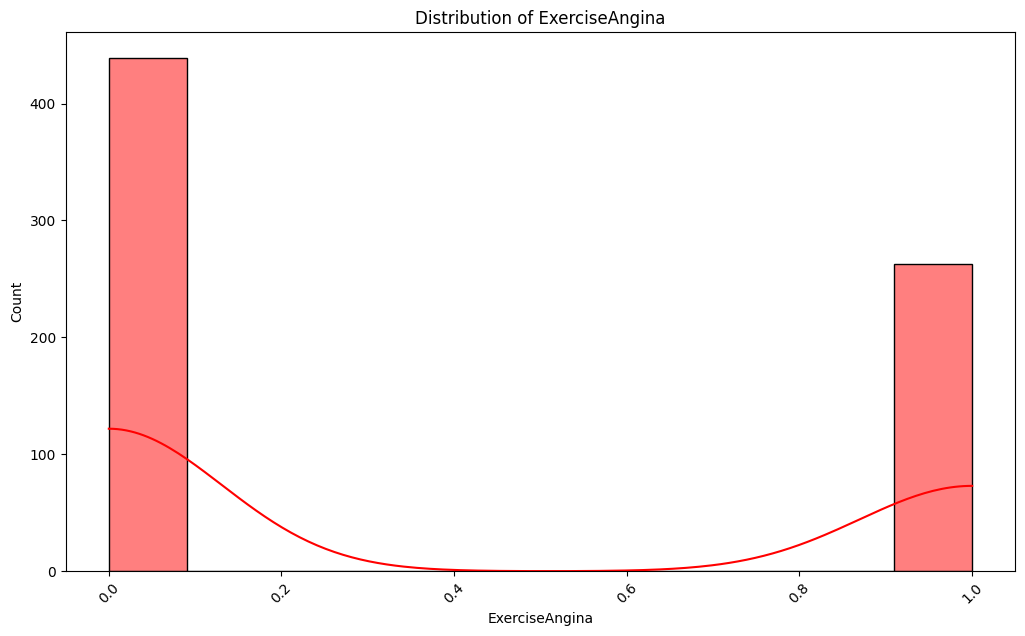

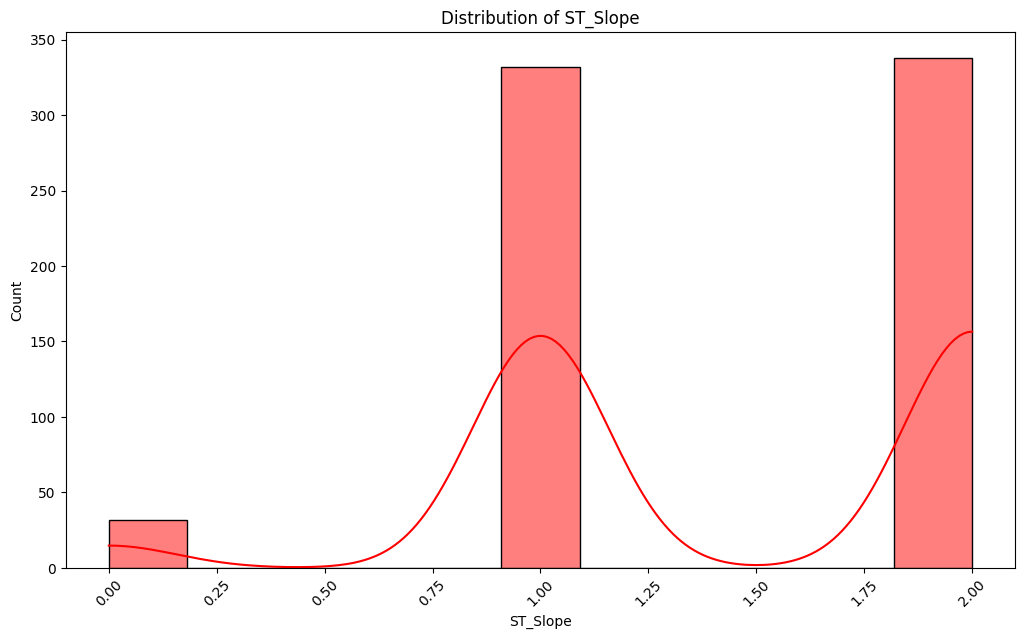

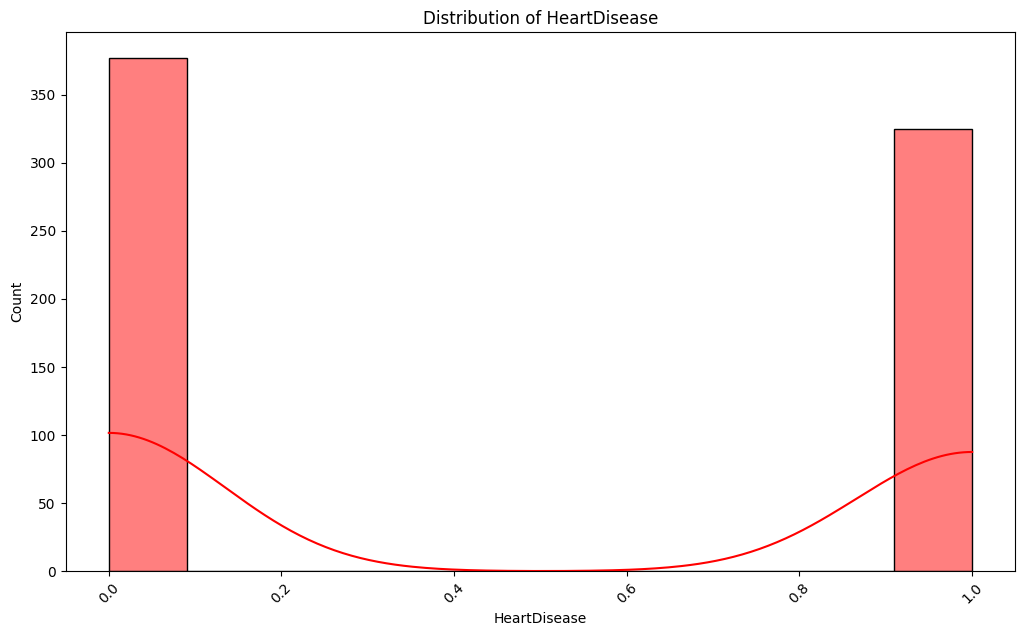

In [105]:
for column in df_stand2.columns:
    plt.figure(figsize=(20, 12))
    
    plt.subplot(2, 2, 2)
    sns.histplot(df_stand2[column], color='red', kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()

Now all of our discrete values are as they were, and the continuos are shifted and scaled to be ranged from -1 to 1

DATA SPLITING

BEFORE standardization

Splitting our data frame into x and y where x is all the features and y is the target; aka patient has heart disease or not

In [305]:
x = df_cleaned.drop('HeartDisease', axis='columns')
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
697,45,1,3,110,264,0,1,132,0,1.2,1
698,68,1,0,144,193,1,1,141,0,3.4,1
699,57,1,0,130,131,0,1,115,1,1.2,1
700,57,0,1,130,236,0,0,174,0,0.0,1


In [278]:
y = df_cleaned['HeartDisease']
y

0      0
1      1
2      0
3      1
4      0
      ..
697    1
698    1
699    1
700    1
701    0
Name: HeartDisease, Length: 702, dtype: int64

Now splitting the data into training, testing and validation set

Training set will be 60% of the whole data

The rest will be split 50% for validating and 50% for testing

In [306]:
X_train, X_remaining, y_train, y_remaining = train_test_split(x, y, test_size=0.4,random_state=40)

X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.7,random_state=40)

print("Size of training set:", X_train.shape[0])
print("Size of test set:", X_test.shape[0])
print("Size of validation set:", X_val.shape[0])

Size of training set: 421
Size of test set: 197
Size of validation set: 84


Naive Bayes algorithm

In [369]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB(var_smoothing=1e-7)

training the data

In [370]:
model.fit(X_train,y_train)

GaussianNB(var_smoothing=1e-07)

training set accuracy

In [371]:
accuracy_train = model.score(X_train,y_train)
accuracy_train

0.8551068883610451

testing set accuracy

In [372]:
accuracy_test = model.score(X_test,y_test)
accuracy_test

0.8274111675126904

accuracy set accuracy

In [373]:
accuracy_valdiation = model.score(X_val,y_val)
accuracy_valdiation

0.8333333333333334

Plot training accuracy and validation accuracy  for Naive Bayes


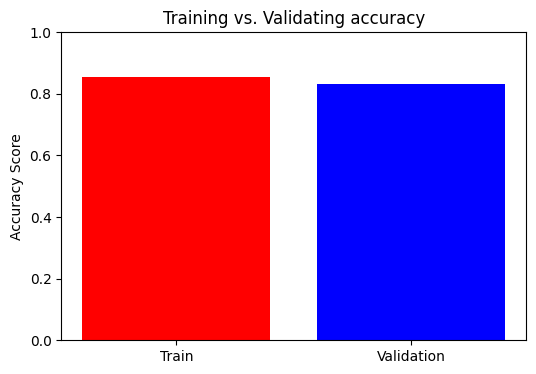

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(['Train', 'Validation'], [accuracy_train,accuracy_valdiation], color=['red', 'blue'])
plt.title('Training vs. Validating accuracy')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1) 
plt.show()

After standarization

DATA SPLITING

In [332]:
x1 = df_stand2.drop('HeartDisease', axis='columns')
x1

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
0,-0.510204,0.230769,0.278997,0.541985,-0.945946,1,1,0,1,0,2
1,-0.142857,0.743590,-0.404389,0.297710,-0.405405,0,2,0,1,0,1
2,-0.632653,-0.025641,0.241379,-0.587786,-0.945946,1,1,0,2,0,2
3,-0.183673,0.179487,-0.191223,-0.435115,-0.135135,0,0,0,1,1,1
4,0.061224,0.487179,-0.310345,-0.221374,-0.945946,1,2,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
697,-0.306122,-0.538462,0.122257,-0.068702,-0.297297,1,3,0,1,0,1
698,0.632653,0.333333,-0.322884,0.068702,0.891892,1,0,1,1,0,1
699,0.183673,-0.025641,-0.711599,-0.328244,-0.297297,1,0,0,1,1,1
700,0.183673,-0.025641,-0.053292,0.572519,-0.945946,0,1,0,0,0,1


In [333]:
y1 = df_stand2['HeartDisease']
y1

0      0
1      1
2      0
3      1
4      0
      ..
697    1
698    1
699    1
700    1
701    0
Name: HeartDisease, Length: 702, dtype: int64

Now splitting the data into training, testing and validation set

In [334]:
X_train1, X_remaining1, y_train1, y_remaining1 = train_test_split(x1, y1, test_size=0.4,random_state=40)

X_val1, X_test1, y_val1, y_test1 = train_test_split(X_remaining1, y_remaining1, test_size=0.7,random_state=40)

print("Size of training set:", X_train1.shape[0])
print("Size of test set:", X_test1.shape[0])
print("Size of validation set:", X_val1.shape[0])

Size of training set: 421
Size of test set: 197
Size of validation set: 84


Naive Bayes algorithm

In [336]:
model1 = GaussianNB(var_smoothing=1e-7)

training the data

In [337]:
model1.fit(X_train1,y_train1)

GaussianNB(var_smoothing=1e-07)

training set accuracy

In [338]:
accuracy_train1 = model1.score(X_train1,y_train1)
accuracy_train1

0.8551068883610451

testing set accuracy

In [339]:
accuracy_test1 = model1.score(X_test1,y_test1)
accuracy_test1

0.8274111675126904

accuracy set accuracy

In [340]:
accuracy_valdiation1 = model1.score(X_val1,y_val1)
accuracy_valdiation1

0.8333333333333334

Plot training accuracy and validation accuracy  for Naive Bayes


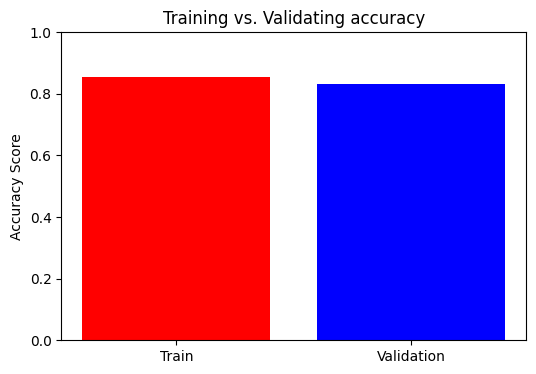

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(['Train', 'Validation'], [accuracy_train,accuracy_valdiation], color=['red', 'blue'])
plt.title('Training vs. Validating accuracy')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1) 
plt.show()

Here, the standarization didn't affect the result, but it's a good step that we might need later on

GRID SEARCH


In [351]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

clf_gnb = GridSearchCV(
    GaussianNB(),
    {
        'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-4]
    },
    cv=5,
    return_train_score=False
)

In [355]:
clf_gnb.fit(X_train, y_train)
print("\nBest Parameters for GaussianNB:", clf_gnb.best_params_)


Best Parameters for GaussianNB: {'var_smoothing': 1e-05}


As we can see, the var smoothing with value 1e-05 is the best value, lets try to run with it

In [362]:
from sklearn.naive_bayes import GaussianNB 
modelGrid = GaussianNB(var_smoothing=1e-5)

training the data

In [363]:
modelGrid.fit(X_train,y_train)

GaussianNB(var_smoothing=1e-05)

training set accuracy

In [364]:
accuracy_trainGrid = modelGrid.score(X_train,y_train)
accuracy_trainGrid

0.8598574821852731

testing set accuracy

In [365]:
accuracy_testGrid = modelGrid.score(X_test,y_test)
accuracy_testGrid

0.8274111675126904

accuracy set accuracy

In [366]:
accuracy_valdiationGrid = modelGrid.score(X_val,y_val)
accuracy_valdiationGrid

0.8333333333333334

Plot training accuracy and validation accuracy  for Naive Bayes


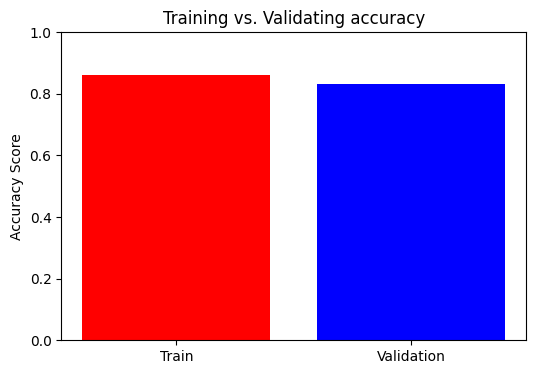

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(['Train', 'Validation'], [accuracy_train,accuracy_valdiation], color=['red', 'blue'])
plt.title('Training vs. Validating accuracy')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.show()

Testing Bayes

In [377]:
y_pred = modelGrid.predict(X_test)

In [381]:
bayes_acc = accuracy_score(y_test, y_pred)
bayes_per = precision_score(y_test, y_pred)
bayes_rec = recall_score(y_test, y_pred)
bayes_f1 = f1_score(y_test, y_pred)

print("Accuracy:", bayes_acc)
print("Precision:", bayes_per)
print("Recall:", bayes_rec)
print("F1 Score:", bayes_f1)

Accuracy: 0.8274111675126904
Precision: 0.8452380952380952
Recall: 0.7717391304347826
F1 Score: 0.8068181818181818


Confusion Matrix

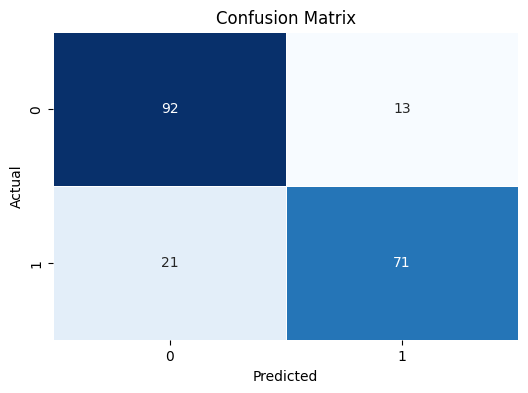

In [382]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()